In [136]:
from time import sleep
import json
import pandas as pd
import io
from twython import Twython
import re 
from tqdm import tnrange, tqdm_notebook, tqdm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import urllib
import datetime
from matplotlib import pyplot as plt

In [60]:
CURRENCY = "bitcoin"
CURRENCY_SYMBOL = "BTC"

TWEETS_FOLDER    = f"data/crypto/{CURRENCY_SYMBOL}" 
SEP_CHAR         = '~' 
ENVS             = ['CRYPTO', 'LINE_COUNT', 'MOST_RECENT_FILE', 'MOST_RECENT_ID'] 
MAX_ROW_PER_FILE = 20000 

query = f'#{CURRENCY} OR #{CURRENCY_SYMBOL}' 
tweets_raw_file = f'tweets_raw.csv'
tweet_clean = f'tweets_clean.csv'

In [53]:
APP_KEY = 'enter key here'
APP_SECRET = 'enter secret here '
twitter = Twython(APP_KEY, APP_SECRET, oauth_version=2)
ACCESS_TOKEN = twitter.obtain_access_token()
twitter = Twython(APP_KEY, access_token=ACCESS_TOKEN)
twitter.get_application_rate_limit_status()['resources']['search']

{'/search/tweets': {'limit': 450, 'remaining': 450, 'reset': 1572388758}}

In [24]:
t2 = twitter.search(q=query, lang='en', result_type='mixed', count="100")["statuses"]

In [54]:
NUMBER_OF_QUERIES = 450
data = {"statuses": []}
record = None
with open(tweets_raw_file,"a+", encoding='utf-8') as f:
    if not record:
        f.write("ID,Text,UserName,UserFollowerCount,RetweetCount,Likes,CreatedAt\n")
    while(True):
        twitter = Twython(APP_KEY, access_token=ACCESS_TOKEN)
        l = 0
        for i in tqdm_notebook(range(NUMBER_OF_QUERIES)):
            if not record:
                data = twitter.search(q=query, lang='en', result_type='recent', count="100") 
            else:
                data["statuses"].extend(twitter.search(q=query, lang='en', result_type='mixed', count="100", max_id=record)["statuses"])
            if len(data["statuses"]) > 1:
                record = data["statuses"][len(data["statuses"]) - 1]['id']
            if l + 1 == len(data["statuses"]):
                break
            else:
                l = len(data["statuses"])

        print('Retrieved {0}, waiting for 15 minutes until next queries'.format(len(data["statuses"])))
        
        df = pd.DataFrame([[s["id"], s["text"].replace('\n','').replace('\r',''), s["user"]["name"], s["user"]["followers_count"], s["retweet_count"], s["favorite_count"], s["created_at"]] for s in data["statuses"]], columns=('ID', 'Text', 'UserName', "UserFollowerCount", 'RetweetCount', 'Likes', "CreatedAt"))
        df.to_csv(f, mode='a', encoding='utf-8',index=False,header=False)
        
        if l + 1 == len(data["statuses"]):
            print('No more new tweets, stopping...')
            break
        data["statuses"] = []
        
        sleep(900)


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 309/450 [01:22<00:36,  3.85it/s]


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 450/450 [02:00<00:00,  3.99it/s]

Retrieved 42809, waiting for 15 minutes until next queries



 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 309/450 [01:30<00:38,  3.64it/s]


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 450/450 [02:19<00:00,  2.95it/s]

Retrieved 43417, waiting for 15 minutes until next queries



 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 309/450 [01:38<00:54,  2.57it/s]


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 450/450 [02:21<00:00,  4.06it/s]

Retrieved 42575, waiting for 15 minutes until next queries



 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 309/450 [01:29<00:55,  2.55it/s]


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 450/450 [02:11<00:00,  4.18it/s]

Retrieved 42286, waiting for 15 minutes until next queries



 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 292/450 [01:26<00:37,  4.27it/s]

Retrieved 27617, waiting for 15 minutes until next queries
No more new tweets, stopping...


In [56]:
df = pd.read_csv(tweets_raw_file)
for i,s in enumerate(tqdm_notebook(df['Text'])):
    text = df.loc[i, 'Text']
    text = text.replace("#", "")
    text = re.sub('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', '', text, flags=re.MULTILINE)
    text = re.sub('@\\w+ *', '', text, flags=re.MULTILINE)
    df.loc[i, 'Text'] = text



  0%|          | 0/198704 [00:00<?, ?it/s]

  0%|          | 6/198704 [00:00<1:00:26, 54.79it/s]

  0%|          | 12/198704 [00:00<59:23, 55.76it/s] 

  0%|          | 18/198704 [00:00<58:40, 56.43it/s]

  0%|          | 24/198704 [00:00<58:35, 56.52it/s]

  0%|          | 30/198704 [00:00<57:48, 57.28it/s]

  0%|          | 36/198704 [00:00<57:20, 57.74it/s]

  0%|          | 42/198704 [00:00<58:23, 56.70it/s]

  0%|          | 48/198704 [00:00<57:28, 57.60it/s]

  0%|          | 54/198704 [00:00<59:24, 55.74it/s]

  0%|          | 60/198704 [00:01<58:53, 56.22it/s]

  0%|          | 66/198704 [00:01<57:56, 57.13it/s]

  0%|          | 73/198704 [00:01<56:53, 58.19it/s]

  0%|          | 80/198704 [00:01<56:06, 58.99it/s]

  0%|          | 86/198704 [00:01<56:21, 58.73it/s]

  0%|          | 93/198704 [00:01<55:22, 59.78it/s]

  0%|          | 99/198704 [00:01<56:11, 58.92it/s]

  0%|          | 105/198704 [00:01<56:34, 58.51it/s]

  0%|          | 112/198704 [00:01<55:48, 59.30it/

  1%|          | 1852/198704 [00:29<53:36, 61.19it/s]

  1%|          | 1859/198704 [00:30<54:23, 60.31it/s]

  1%|          | 1866/198704 [00:30<54:25, 60.28it/s]

  1%|          | 1873/198704 [00:30<53:23, 61.44it/s]

  1%|          | 1880/198704 [00:30<52:45, 62.18it/s]

  1%|          | 1887/198704 [00:30<51:58, 63.11it/s]

  1%|          | 1894/198704 [00:30<51:34, 63.59it/s]

  1%|          | 1901/198704 [00:30<51:05, 64.20it/s]

  1%|          | 1908/198704 [00:30<51:33, 63.61it/s]

  1%|          | 1915/198704 [00:30<53:56, 60.80it/s]

  1%|          | 1922/198704 [00:31<53:41, 61.08it/s]

  1%|          | 1929/198704 [00:31<52:45, 62.16it/s]

  1%|          | 1936/198704 [00:31<51:58, 63.10it/s]

  1%|          | 1943/198704 [00:31<54:55, 59.71it/s]

  1%|          | 1950/198704 [00:31<54:30, 60.17it/s]

  1%|          | 1957/198704 [00:31<54:46, 59.87it/s]

  1%|          | 1964/198704 [00:31<54:42, 59.94it/s]

  1%|          | 1971/198704 [00:31<53:30, 61.28it/s]

  1%|     

  2%|‚ñè         | 3721/198704 [00:59<53:27, 60.79it/s]

  2%|‚ñè         | 3728/198704 [00:59<52:18, 62.12it/s]

  2%|‚ñè         | 3735/198704 [00:59<53:11, 61.08it/s]

  2%|‚ñè         | 3742/198704 [00:59<54:04, 60.09it/s]

  2%|‚ñè         | 3749/198704 [00:59<53:40, 60.54it/s]

  2%|‚ñè         | 3756/198704 [00:59<52:20, 62.07it/s]

  2%|‚ñè         | 3763/198704 [00:59<52:25, 61.98it/s]

  2%|‚ñè         | 3770/198704 [00:59<53:46, 60.42it/s]

  2%|‚ñè         | 3777/198704 [00:59<55:42, 58.32it/s]

  2%|‚ñè         | 3783/198704 [01:00<57:07, 56.86it/s]

  2%|‚ñè         | 3789/198704 [01:00<1:00:36, 53.59it/s]

  2%|‚ñè         | 3795/198704 [01:00<58:42, 55.33it/s]  

  2%|‚ñè         | 3802/198704 [01:00<56:08, 57.86it/s]

  2%|‚ñè         | 3809/198704 [01:00<54:36, 59.49it/s]

  2%|‚ñè         | 3816/198704 [01:00<55:22, 58.66it/s]

  2%|‚ñè         | 3822/198704 [01:00<55:57, 58.04it/s]

  2%|‚ñè         | 3829/198704 [01:00<55:15, 58.79it/s]

  2%|‚ñè         | 3836/198

  3%|‚ñé         | 5553/198704 [01:29<1:00:25, 53.27it/s]

  3%|‚ñé         | 5560/198704 [01:29<57:58, 55.52it/s]  

  3%|‚ñé         | 5567/198704 [01:29<56:00, 57.46it/s]

  3%|‚ñé         | 5573/198704 [01:29<1:00:26, 53.26it/s]

  3%|‚ñé         | 5579/198704 [01:29<59:31, 54.07it/s]  

  3%|‚ñé         | 5585/198704 [01:29<58:56, 54.61it/s]

  3%|‚ñé         | 5591/198704 [01:30<58:46, 54.77it/s]

  3%|‚ñé         | 5598/198704 [01:30<56:00, 57.46it/s]

  3%|‚ñé         | 5605/198704 [01:30<53:52, 59.74it/s]

  3%|‚ñé         | 5612/198704 [01:30<53:25, 60.24it/s]

  3%|‚ñé         | 5619/198704 [01:30<55:40, 57.80it/s]

  3%|‚ñé         | 5625/198704 [01:30<55:59, 57.47it/s]

  3%|‚ñé         | 5631/198704 [01:30<56:11, 57.26it/s]

  3%|‚ñé         | 5638/198704 [01:30<54:17, 59.27it/s]

  3%|‚ñé         | 5645/198704 [01:30<52:43, 61.03it/s]

  3%|‚ñé         | 5652/198704 [01:31<51:46, 62.15it/s]

  3%|‚ñé         | 5659/198704 [01:31<52:00, 61.87it/s]

  3%|‚ñé         | 5666

  4%|‚ñé         | 7414/198704 [01:57<48:34, 65.64it/s]

  4%|‚ñé         | 7421/198704 [01:58<48:21, 65.93it/s]

  4%|‚ñé         | 7428/198704 [01:58<48:26, 65.80it/s]

  4%|‚ñé         | 7435/198704 [01:58<48:42, 65.45it/s]

  4%|‚ñé         | 7442/198704 [01:58<48:51, 65.23it/s]

  4%|‚ñé         | 7449/198704 [01:58<48:43, 65.43it/s]

  4%|‚ñç         | 7456/198704 [01:58<48:46, 65.35it/s]

  4%|‚ñç         | 7463/198704 [01:58<48:36, 65.57it/s]

  4%|‚ñç         | 7470/198704 [01:58<48:26, 65.79it/s]

  4%|‚ñç         | 7477/198704 [01:58<48:31, 65.67it/s]

  4%|‚ñç         | 7484/198704 [01:59<48:26, 65.79it/s]

  4%|‚ñç         | 7491/198704 [01:59<48:22, 65.88it/s]

  4%|‚ñç         | 7498/198704 [01:59<48:23, 65.86it/s]

  4%|‚ñç         | 7505/198704 [01:59<48:19, 65.95it/s]

  4%|‚ñç         | 7512/198704 [01:59<48:26, 65.78it/s]

  4%|‚ñç         | 7519/198704 [01:59<48:21, 65.89it/s]

  4%|‚ñç         | 7526/198704 [01:59<48:16, 66.00it/s]

  4%|‚ñç         | 7533/198704 

  5%|‚ñç         | 9290/198704 [02:26<48:02, 65.72it/s]

  5%|‚ñç         | 9297/198704 [02:26<47:57, 65.82it/s]

  5%|‚ñç         | 9304/198704 [02:26<48:02, 65.72it/s]

  5%|‚ñç         | 9311/198704 [02:26<47:50, 65.97it/s]

  5%|‚ñç         | 9318/198704 [02:26<47:39, 66.23it/s]

  5%|‚ñç         | 9325/198704 [02:27<47:40, 66.20it/s]

  5%|‚ñç         | 9332/198704 [02:27<47:34, 66.35it/s]

  5%|‚ñç         | 9339/198704 [02:27<47:38, 66.25it/s]

  5%|‚ñç         | 9346/198704 [02:27<47:52, 65.92it/s]

  5%|‚ñç         | 9353/198704 [02:27<47:42, 66.16it/s]

  5%|‚ñç         | 9360/198704 [02:27<47:47, 66.03it/s]

  5%|‚ñç         | 9367/198704 [02:27<48:07, 65.58it/s]

  5%|‚ñç         | 9374/198704 [02:27<47:51, 65.92it/s]

  5%|‚ñç         | 9381/198704 [02:27<47:41, 66.17it/s]

  5%|‚ñç         | 9388/198704 [02:28<47:46, 66.04it/s]

  5%|‚ñç         | 9395/198704 [02:28<47:56, 65.82it/s]

  5%|‚ñç         | 9402/198704 [02:28<47:45, 66.07it/s]

  5%|‚ñç         | 9409/198704 

  6%|‚ñå         | 11145/198704 [02:54<47:31, 65.77it/s]

  6%|‚ñå         | 11152/198704 [02:54<47:39, 65.58it/s]

  6%|‚ñå         | 11159/198704 [02:54<47:25, 65.91it/s]

  6%|‚ñå         | 11166/198704 [02:54<47:14, 66.15it/s]

  6%|‚ñå         | 11173/198704 [02:55<47:07, 66.32it/s]

  6%|‚ñå         | 11180/198704 [02:55<47:18, 66.06it/s]

  6%|‚ñå         | 11187/198704 [02:55<47:26, 65.88it/s]

  6%|‚ñå         | 11194/198704 [02:55<47:24, 65.93it/s]

  6%|‚ñå         | 11201/198704 [02:55<47:25, 65.90it/s]

  6%|‚ñå         | 11208/198704 [02:55<47:27, 65.84it/s]

  6%|‚ñå         | 11215/198704 [02:55<47:19, 66.02it/s]

  6%|‚ñå         | 11222/198704 [02:55<47:16, 66.10it/s]

  6%|‚ñå         | 11229/198704 [02:55<47:15, 66.11it/s]

  6%|‚ñå         | 11236/198704 [02:56<47:07, 66.30it/s]

  6%|‚ñå         | 11243/198704 [02:56<47:12, 66.18it/s]

  6%|‚ñå         | 11250/198704 [02:56<47:13, 66.16it/s]

  6%|‚ñå         | 11257/198704 [02:56<47:24, 65.91it/s]

  6%|‚ñå      

  7%|‚ñã         | 12993/198704 [03:22<47:19, 65.40it/s]

  7%|‚ñã         | 13000/198704 [03:22<47:24, 65.29it/s]

  7%|‚ñã         | 13007/198704 [03:23<47:25, 65.26it/s]

  7%|‚ñã         | 13014/198704 [03:23<47:17, 65.44it/s]

  7%|‚ñã         | 13021/198704 [03:23<47:03, 65.76it/s]

  7%|‚ñã         | 13028/198704 [03:23<47:11, 65.58it/s]

  7%|‚ñã         | 13035/198704 [03:23<47:12, 65.55it/s]

  7%|‚ñã         | 13042/198704 [03:23<47:03, 65.75it/s]

  7%|‚ñã         | 13049/198704 [03:23<46:55, 65.94it/s]

  7%|‚ñã         | 13056/198704 [03:23<46:46, 66.16it/s]

  7%|‚ñã         | 13063/198704 [03:23<46:54, 65.96it/s]

  7%|‚ñã         | 13070/198704 [03:23<46:47, 66.13it/s]

  7%|‚ñã         | 13077/198704 [03:24<46:44, 66.19it/s]

  7%|‚ñã         | 13084/198704 [03:24<46:55, 65.92it/s]

  7%|‚ñã         | 13091/198704 [03:24<46:50, 66.03it/s]

  7%|‚ñã         | 13098/198704 [03:24<46:42, 66.22it/s]

  7%|‚ñã         | 13105/198704 [03:24<46:45, 66.15it/s]

  7%|‚ñã      

  7%|‚ñã         | 14841/198704 [03:51<46:56, 65.28it/s]

  7%|‚ñã         | 14848/198704 [03:51<46:51, 65.40it/s]

  7%|‚ñã         | 14855/198704 [03:51<46:53, 65.35it/s]

  7%|‚ñã         | 14862/198704 [03:51<47:07, 65.02it/s]

  7%|‚ñã         | 14869/198704 [03:51<47:08, 64.99it/s]

  7%|‚ñã         | 14876/198704 [03:51<47:19, 64.75it/s]

  7%|‚ñã         | 14883/198704 [03:51<47:16, 64.81it/s]

  7%|‚ñã         | 14890/198704 [03:51<46:52, 65.35it/s]

  7%|‚ñã         | 14897/198704 [03:51<46:41, 65.62it/s]

  8%|‚ñä         | 14904/198704 [03:52<46:30, 65.86it/s]

  8%|‚ñä         | 14911/198704 [03:52<46:33, 65.80it/s]

  8%|‚ñä         | 14918/198704 [03:52<46:43, 65.54it/s]

  8%|‚ñä         | 14925/198704 [03:52<46:57, 65.22it/s]

  8%|‚ñä         | 14932/198704 [03:52<47:02, 65.11it/s]

  8%|‚ñä         | 14939/198704 [03:52<46:51, 65.36it/s]

  8%|‚ñä         | 14946/198704 [03:52<46:45, 65.49it/s]

  8%|‚ñä         | 14953/198704 [03:52<46:42, 65.56it/s]

  8%|‚ñä      

  8%|‚ñä         | 16689/198704 [04:19<46:14, 65.59it/s]

  8%|‚ñä         | 16696/198704 [04:19<46:18, 65.50it/s]

  8%|‚ñä         | 16703/198704 [04:19<46:10, 65.70it/s]

  8%|‚ñä         | 16710/198704 [04:19<46:25, 65.33it/s]

  8%|‚ñä         | 16717/198704 [04:19<46:09, 65.70it/s]

  8%|‚ñä         | 16724/198704 [04:19<46:02, 65.87it/s]

  8%|‚ñä         | 16731/198704 [04:19<45:56, 66.01it/s]

  8%|‚ñä         | 16738/198704 [04:20<45:50, 66.15it/s]

  8%|‚ñä         | 16745/198704 [04:20<46:00, 65.91it/s]

  8%|‚ñä         | 16752/198704 [04:20<46:04, 65.82it/s]

  8%|‚ñä         | 16759/198704 [04:20<46:16, 65.53it/s]

  8%|‚ñä         | 16766/198704 [04:20<46:28, 65.23it/s]

  8%|‚ñä         | 16773/198704 [04:20<46:33, 65.13it/s]

  8%|‚ñä         | 16780/198704 [04:20<46:27, 65.27it/s]

  8%|‚ñä         | 16787/198704 [04:20<46:16, 65.51it/s]

  8%|‚ñä         | 16794/198704 [04:20<46:29, 65.21it/s]

  8%|‚ñä         | 16801/198704 [04:20<46:30, 65.19it/s]

  8%|‚ñä      

  9%|‚ñâ         | 18537/198704 [04:47<46:01, 65.24it/s]

  9%|‚ñâ         | 18544/198704 [04:47<45:56, 65.36it/s]

  9%|‚ñâ         | 18551/198704 [04:47<46:05, 65.14it/s]

  9%|‚ñâ         | 18558/198704 [04:47<46:06, 65.12it/s]

  9%|‚ñâ         | 18565/198704 [04:48<45:54, 65.39it/s]

  9%|‚ñâ         | 18572/198704 [04:48<46:02, 65.20it/s]

  9%|‚ñâ         | 18579/198704 [04:48<45:51, 65.47it/s]

  9%|‚ñâ         | 18586/198704 [04:48<45:53, 65.41it/s]

  9%|‚ñâ         | 18593/198704 [04:48<45:57, 65.32it/s]

  9%|‚ñâ         | 18600/198704 [04:48<45:59, 65.26it/s]

  9%|‚ñâ         | 18607/198704 [04:48<45:57, 65.31it/s]

  9%|‚ñâ         | 18614/198704 [04:48<45:44, 65.62it/s]

  9%|‚ñâ         | 18621/198704 [04:48<45:47, 65.54it/s]

  9%|‚ñâ         | 18628/198704 [04:49<46:00, 65.24it/s]

  9%|‚ñâ         | 18635/198704 [04:49<45:47, 65.53it/s]

  9%|‚ñâ         | 18642/198704 [04:49<45:40, 65.71it/s]

  9%|‚ñâ         | 18649/198704 [04:49<46:04, 65.14it/s]

  9%|‚ñâ      

 10%|‚ñà         | 20385/198704 [05:15<45:46, 64.92it/s]

 10%|‚ñà         | 20392/198704 [05:16<45:44, 64.98it/s]

 10%|‚ñà         | 20399/198704 [05:16<45:46, 64.93it/s]

 10%|‚ñà         | 20406/198704 [05:16<48:12, 61.64it/s]

 10%|‚ñà         | 20413/198704 [05:16<47:25, 62.67it/s]

 10%|‚ñà         | 20420/198704 [05:16<46:41, 63.63it/s]

 10%|‚ñà         | 20427/198704 [05:16<46:11, 64.34it/s]

 10%|‚ñà         | 20434/198704 [05:16<46:12, 64.29it/s]

 10%|‚ñà         | 20441/198704 [05:16<45:50, 64.81it/s]

 10%|‚ñà         | 20448/198704 [05:16<45:33, 65.21it/s]

 10%|‚ñà         | 20455/198704 [05:16<45:36, 65.14it/s]

 10%|‚ñà         | 20462/198704 [05:17<45:25, 65.39it/s]

 10%|‚ñà         | 20469/198704 [05:17<45:14, 65.65it/s]

 10%|‚ñà         | 20476/198704 [05:17<45:34, 65.18it/s]

 10%|‚ñà         | 20483/198704 [05:17<45:23, 65.44it/s]

 10%|‚ñà         | 20490/198704 [05:17<45:20, 65.51it/s]

 10%|‚ñà         | 20497/198704 [05:17<46:14, 64.23it/s]

 10%|‚ñà      

 11%|‚ñà         | 22233/198704 [05:44<44:50, 65.59it/s]

 11%|‚ñà         | 22240/198704 [05:44<44:49, 65.61it/s]

 11%|‚ñà         | 22247/198704 [05:44<44:59, 65.37it/s]

 11%|‚ñà         | 22254/198704 [05:44<45:01, 65.32it/s]

 11%|‚ñà         | 22261/198704 [05:44<45:09, 65.12it/s]

 11%|‚ñà         | 22268/198704 [05:44<44:57, 65.41it/s]

 11%|‚ñà         | 22275/198704 [05:44<45:08, 65.13it/s]

 11%|‚ñà         | 22282/198704 [05:45<45:04, 65.23it/s]

 11%|‚ñà         | 22289/198704 [05:45<45:00, 65.34it/s]

 11%|‚ñà         | 22296/198704 [05:45<44:51, 65.55it/s]

 11%|‚ñà         | 22303/198704 [05:45<44:45, 65.68it/s]

 11%|‚ñà         | 22310/198704 [05:45<44:57, 65.39it/s]

 11%|‚ñà         | 22317/198704 [05:45<44:59, 65.35it/s]

 11%|‚ñà         | 22324/198704 [05:45<44:58, 65.36it/s]

 11%|‚ñà         | 22331/198704 [05:45<44:59, 65.34it/s]

 11%|‚ñà         | 22338/198704 [05:45<45:02, 65.25it/s]

 11%|‚ñà         | 22345/198704 [05:45<44:50, 65.55it/s]

 11%|‚ñà      

 12%|‚ñà‚ñè        | 24081/198704 [06:12<44:35, 65.26it/s]

 12%|‚ñà‚ñè        | 24088/198704 [06:12<44:25, 65.50it/s]

 12%|‚ñà‚ñè        | 24095/198704 [06:12<44:32, 65.34it/s]

 12%|‚ñà‚ñè        | 24102/198704 [06:12<44:37, 65.22it/s]

 12%|‚ñà‚ñè        | 24109/198704 [06:13<44:27, 65.45it/s]

 12%|‚ñà‚ñè        | 24116/198704 [06:13<44:21, 65.59it/s]

 12%|‚ñà‚ñè        | 24123/198704 [06:13<44:15, 65.75it/s]

 12%|‚ñà‚ñè        | 24130/198704 [06:13<44:12, 65.82it/s]

 12%|‚ñà‚ñè        | 24137/198704 [06:13<44:12, 65.81it/s]

 12%|‚ñà‚ñè        | 24144/198704 [06:13<44:22, 65.56it/s]

 12%|‚ñà‚ñè        | 24151/198704 [06:13<44:16, 65.71it/s]

 12%|‚ñà‚ñè        | 24158/198704 [06:13<44:18, 65.65it/s]

 12%|‚ñà‚ñè        | 24165/198704 [06:13<44:24, 65.51it/s]

 12%|‚ñà‚ñè        | 24172/198704 [06:14<44:34, 65.27it/s]

 12%|‚ñà‚ñè        | 24179/198704 [06:14<44:35, 65.22it/s]

 12%|‚ñà‚ñè        | 24186/198704 [06:14<44:25, 65.47it/s]

 12%|‚ñà‚ñè        | 24193/198704 [06:14

 13%|‚ñà‚ñé        | 25929/198704 [06:41<44:16, 65.03it/s]

 13%|‚ñà‚ñé        | 25936/198704 [06:41<44:21, 64.92it/s]

 13%|‚ñà‚ñé        | 25943/198704 [06:41<44:19, 64.96it/s]

 13%|‚ñà‚ñé        | 25950/198704 [06:41<44:17, 65.01it/s]

 13%|‚ñà‚ñé        | 25957/198704 [06:41<44:09, 65.20it/s]

 13%|‚ñà‚ñé        | 25964/198704 [06:41<44:18, 64.98it/s]

 13%|‚ñà‚ñé        | 25971/198704 [06:41<44:30, 64.68it/s]

 13%|‚ñà‚ñé        | 25978/198704 [06:41<44:23, 64.84it/s]

 13%|‚ñà‚ñé        | 25985/198704 [06:41<44:26, 64.78it/s]

 13%|‚ñà‚ñé        | 25992/198704 [06:41<44:18, 64.96it/s]

 13%|‚ñà‚ñé        | 25999/198704 [06:42<44:14, 65.07it/s]

 13%|‚ñà‚ñé        | 26006/198704 [06:42<44:02, 65.36it/s]

 13%|‚ñà‚ñé        | 26013/198704 [06:42<44:01, 65.37it/s]

 13%|‚ñà‚ñé        | 26020/198704 [06:42<44:03, 65.31it/s]

 13%|‚ñà‚ñé        | 26027/198704 [06:42<44:02, 65.34it/s]

 13%|‚ñà‚ñé        | 26034/198704 [06:42<44:16, 65.00it/s]

 13%|‚ñà‚ñé        | 26041/198704 [06:42

 14%|‚ñà‚ñç        | 27777/198704 [07:09<44:19, 64.26it/s]

 14%|‚ñà‚ñç        | 27784/198704 [07:09<44:13, 64.40it/s]

 14%|‚ñà‚ñç        | 27791/198704 [07:09<44:03, 64.64it/s]

 14%|‚ñà‚ñç        | 27798/198704 [07:09<43:51, 64.95it/s]

 14%|‚ñà‚ñç        | 27805/198704 [07:09<43:38, 65.26it/s]

 14%|‚ñà‚ñç        | 27812/198704 [07:09<43:29, 65.49it/s]

 14%|‚ñà‚ñç        | 27819/198704 [07:10<43:31, 65.43it/s]

 14%|‚ñà‚ñç        | 27826/198704 [07:10<43:25, 65.59it/s]

 14%|‚ñà‚ñç        | 27833/198704 [07:10<43:21, 65.67it/s]

 14%|‚ñà‚ñç        | 27840/198704 [07:10<43:24, 65.60it/s]

 14%|‚ñà‚ñç        | 27847/198704 [07:10<43:31, 65.43it/s]

 14%|‚ñà‚ñç        | 27854/198704 [07:10<43:25, 65.58it/s]

 14%|‚ñà‚ñç        | 27861/198704 [07:10<43:30, 65.43it/s]

 14%|‚ñà‚ñç        | 27868/198704 [07:10<43:38, 65.25it/s]

 14%|‚ñà‚ñç        | 27875/198704 [07:10<43:40, 65.20it/s]

 14%|‚ñà‚ñç        | 27882/198704 [07:10<43:42, 65.15it/s]

 14%|‚ñà‚ñç        | 27889/198704 [07:11

 15%|‚ñà‚ñç        | 29625/198704 [07:37<43:12, 65.22it/s]

 15%|‚ñà‚ñç        | 29632/198704 [07:38<43:23, 64.93it/s]

 15%|‚ñà‚ñç        | 29639/198704 [07:38<43:32, 64.72it/s]

 15%|‚ñà‚ñç        | 29646/198704 [07:38<43:36, 64.62it/s]

 15%|‚ñà‚ñç        | 29653/198704 [07:38<43:26, 64.85it/s]

 15%|‚ñà‚ñç        | 29660/198704 [07:38<43:24, 64.92it/s]

 15%|‚ñà‚ñç        | 29667/198704 [07:38<43:13, 65.18it/s]

 15%|‚ñà‚ñç        | 29674/198704 [07:38<43:22, 64.96it/s]

 15%|‚ñà‚ñç        | 29681/198704 [07:38<43:31, 64.72it/s]

 15%|‚ñà‚ñç        | 29688/198704 [07:38<43:22, 64.94it/s]

 15%|‚ñà‚ñç        | 29695/198704 [07:39<43:10, 65.25it/s]

 15%|‚ñà‚ñç        | 29702/198704 [07:39<43:04, 65.39it/s]

 15%|‚ñà‚ñç        | 29709/198704 [07:39<43:08, 65.29it/s]

 15%|‚ñà‚ñç        | 29716/198704 [07:39<44:19, 63.54it/s]

 15%|‚ñà‚ñç        | 29723/198704 [07:39<43:56, 64.10it/s]

 15%|‚ñà‚ñç        | 29730/198704 [07:39<43:42, 64.44it/s]

 15%|‚ñà‚ñç        | 29737/198704 [07:39

 16%|‚ñà‚ñå        | 31473/198704 [08:06<43:54, 63.48it/s]

 16%|‚ñà‚ñå        | 31480/198704 [08:06<43:37, 63.88it/s]

 16%|‚ñà‚ñå        | 31487/198704 [08:06<43:30, 64.05it/s]

 16%|‚ñà‚ñå        | 31494/198704 [08:06<43:33, 63.98it/s]

 16%|‚ñà‚ñå        | 31501/198704 [08:06<43:33, 63.97it/s]

 16%|‚ñà‚ñå        | 31508/198704 [08:07<43:21, 64.27it/s]

 16%|‚ñà‚ñå        | 31515/198704 [08:07<43:11, 64.52it/s]

 16%|‚ñà‚ñå        | 31522/198704 [08:07<42:59, 64.82it/s]

 16%|‚ñà‚ñå        | 31529/198704 [08:07<42:51, 65.01it/s]

 16%|‚ñà‚ñå        | 31536/198704 [08:07<42:42, 65.25it/s]

 16%|‚ñà‚ñå        | 31543/198704 [08:07<42:48, 65.09it/s]

 16%|‚ñà‚ñå        | 31550/198704 [08:07<42:46, 65.12it/s]

 16%|‚ñà‚ñå        | 31557/198704 [08:07<42:40, 65.28it/s]

 16%|‚ñà‚ñå        | 31564/198704 [08:07<42:54, 64.93it/s]

 16%|‚ñà‚ñå        | 31571/198704 [08:08<42:55, 64.90it/s]

 16%|‚ñà‚ñå        | 31578/198704 [08:08<42:46, 65.12it/s]

 16%|‚ñà‚ñå        | 31585/198704 [08:08

 17%|‚ñà‚ñã        | 33321/198704 [08:35<42:45, 64.46it/s]

 17%|‚ñà‚ñã        | 33328/198704 [08:35<42:54, 64.24it/s]

 17%|‚ñà‚ñã        | 33335/198704 [08:35<42:55, 64.22it/s]

 17%|‚ñà‚ñã        | 33342/198704 [08:35<42:43, 64.51it/s]

 17%|‚ñà‚ñã        | 33349/198704 [08:35<42:39, 64.60it/s]

 17%|‚ñà‚ñã        | 33356/198704 [08:35<42:57, 64.15it/s]

 17%|‚ñà‚ñã        | 33363/198704 [08:35<42:46, 64.43it/s]

 17%|‚ñà‚ñã        | 33370/198704 [08:35<42:43, 64.49it/s]

 17%|‚ñà‚ñã        | 33377/198704 [08:36<42:49, 64.35it/s]

 17%|‚ñà‚ñã        | 33384/198704 [08:36<42:43, 64.48it/s]

 17%|‚ñà‚ñã        | 33391/198704 [08:36<42:32, 64.78it/s]

 17%|‚ñà‚ñã        | 33398/198704 [08:36<42:31, 64.78it/s]

 17%|‚ñà‚ñã        | 33405/198704 [08:36<42:36, 64.65it/s]

 17%|‚ñà‚ñã        | 33412/198704 [08:36<42:42, 64.51it/s]

 17%|‚ñà‚ñã        | 33419/198704 [08:36<42:34, 64.71it/s]

 17%|‚ñà‚ñã        | 33426/198704 [08:36<42:44, 64.44it/s]

 17%|‚ñà‚ñã        | 33433/198704 [08:36

 18%|‚ñà‚ñä        | 35169/198704 [09:03<42:19, 64.40it/s]

 18%|‚ñà‚ñä        | 35176/198704 [09:03<42:18, 64.42it/s]

 18%|‚ñà‚ñä        | 35183/198704 [09:04<42:18, 64.41it/s]

 18%|‚ñà‚ñä        | 35190/198704 [09:04<42:08, 64.68it/s]

 18%|‚ñà‚ñä        | 35197/198704 [09:04<42:15, 64.49it/s]

 18%|‚ñà‚ñä        | 35204/198704 [09:04<42:19, 64.39it/s]

 18%|‚ñà‚ñä        | 35211/198704 [09:04<42:20, 64.37it/s]

 18%|‚ñà‚ñä        | 35218/198704 [09:04<42:15, 64.48it/s]

 18%|‚ñà‚ñä        | 35225/198704 [09:04<42:22, 64.30it/s]

 18%|‚ñà‚ñä        | 35232/198704 [09:04<42:21, 64.33it/s]

 18%|‚ñà‚ñä        | 35239/198704 [09:04<42:09, 64.62it/s]

 18%|‚ñà‚ñä        | 35246/198704 [09:05<42:17, 64.43it/s]

 18%|‚ñà‚ñä        | 35253/198704 [09:05<42:04, 64.74it/s]

 18%|‚ñà‚ñä        | 35260/198704 [09:05<42:00, 64.84it/s]

 18%|‚ñà‚ñä        | 35267/198704 [09:05<42:04, 64.74it/s]

 18%|‚ñà‚ñä        | 35274/198704 [09:05<42:10, 64.59it/s]

 18%|‚ñà‚ñä        | 35281/198704 [09:05

 19%|‚ñà‚ñä        | 37017/198704 [09:32<41:37, 64.73it/s]

 19%|‚ñà‚ñä        | 37024/198704 [09:32<41:49, 64.44it/s]

 19%|‚ñà‚ñä        | 37031/198704 [09:32<41:46, 64.50it/s]

 19%|‚ñà‚ñä        | 37038/198704 [09:32<41:37, 64.72it/s]

 19%|‚ñà‚ñä        | 37045/198704 [09:32<41:49, 64.42it/s]

 19%|‚ñà‚ñä        | 37052/198704 [09:33<41:50, 64.40it/s]

 19%|‚ñà‚ñä        | 37059/198704 [09:33<41:43, 64.57it/s]

 19%|‚ñà‚ñä        | 37066/198704 [09:33<41:45, 64.50it/s]

 19%|‚ñà‚ñä        | 37073/198704 [09:33<41:39, 64.66it/s]

 19%|‚ñà‚ñä        | 37080/198704 [09:33<41:45, 64.51it/s]

 19%|‚ñà‚ñä        | 37087/198704 [09:33<41:49, 64.39it/s]

 19%|‚ñà‚ñä        | 37094/198704 [09:33<41:37, 64.71it/s]

 19%|‚ñà‚ñä        | 37101/198704 [09:33<41:45, 64.50it/s]

 19%|‚ñà‚ñä        | 37108/198704 [09:33<41:35, 64.76it/s]

 19%|‚ñà‚ñä        | 37115/198704 [09:34<41:39, 64.65it/s]

 19%|‚ñà‚ñä        | 37122/198704 [09:34<41:40, 64.63it/s]

 19%|‚ñà‚ñä        | 37129/198704 [09:34

 20%|‚ñà‚ñâ        | 38865/198704 [10:01<41:04, 64.85it/s]

 20%|‚ñà‚ñâ        | 38872/198704 [10:01<41:08, 64.75it/s]

 20%|‚ñà‚ñâ        | 38879/198704 [10:01<41:08, 64.75it/s]

 20%|‚ñà‚ñâ        | 38886/198704 [10:01<41:40, 63.91it/s]

 20%|‚ñà‚ñâ        | 38893/198704 [10:01<41:31, 64.14it/s]

 20%|‚ñà‚ñâ        | 38900/198704 [10:01<41:25, 64.30it/s]

 20%|‚ñà‚ñâ        | 38907/198704 [10:01<41:27, 64.24it/s]

 20%|‚ñà‚ñâ        | 38914/198704 [10:01<41:37, 63.99it/s]

 20%|‚ñà‚ñâ        | 38921/198704 [10:02<41:36, 64.01it/s]

 20%|‚ñà‚ñâ        | 38928/198704 [10:02<41:30, 64.15it/s]

 20%|‚ñà‚ñâ        | 38935/198704 [10:02<41:26, 64.26it/s]

 20%|‚ñà‚ñâ        | 38942/198704 [10:02<41:33, 64.06it/s]

 20%|‚ñà‚ñâ        | 38949/198704 [10:02<41:33, 64.08it/s]

 20%|‚ñà‚ñâ        | 38956/198704 [10:02<41:38, 63.93it/s]

 20%|‚ñà‚ñâ        | 38963/198704 [10:02<41:29, 64.17it/s]

 20%|‚ñà‚ñâ        | 38970/198704 [10:02<41:26, 64.24it/s]

 20%|‚ñà‚ñâ        | 38977/198704 [10:02

 20%|‚ñà‚ñà        | 40713/198704 [10:29<40:53, 64.40it/s]

 20%|‚ñà‚ñà        | 40720/198704 [10:30<40:53, 64.38it/s]

 20%|‚ñà‚ñà        | 40727/198704 [10:30<40:50, 64.46it/s]

 20%|‚ñà‚ñà        | 40734/198704 [10:30<40:43, 64.66it/s]

 21%|‚ñà‚ñà        | 40741/198704 [10:30<40:46, 64.57it/s]

 21%|‚ñà‚ñà        | 40748/198704 [10:30<40:51, 64.43it/s]

 21%|‚ñà‚ñà        | 40755/198704 [10:30<41:01, 64.18it/s]

 21%|‚ñà‚ñà        | 40762/198704 [10:30<40:46, 64.57it/s]

 21%|‚ñà‚ñà        | 40769/198704 [10:30<40:46, 64.56it/s]

 21%|‚ñà‚ñà        | 40776/198704 [10:30<40:52, 64.40it/s]

 21%|‚ñà‚ñà        | 40783/198704 [10:30<40:55, 64.32it/s]

 21%|‚ñà‚ñà        | 40790/198704 [10:31<40:47, 64.53it/s]

 21%|‚ñà‚ñà        | 40797/198704 [10:31<40:53, 64.37it/s]

 21%|‚ñà‚ñà        | 40804/198704 [10:31<41:01, 64.14it/s]

 21%|‚ñà‚ñà        | 40811/198704 [10:31<40:51, 64.42it/s]

 21%|‚ñà‚ñà        | 40818/198704 [10:31<40:43, 64.60it/s]

 21%|‚ñà‚ñà        | 40825/198704 [10:31

 21%|‚ñà‚ñà‚ñè       | 42561/198704 [10:58<40:44, 63.88it/s]

 21%|‚ñà‚ñà‚ñè       | 42568/198704 [10:58<40:38, 64.03it/s]

 21%|‚ñà‚ñà‚ñè       | 42575/198704 [10:58<40:42, 63.92it/s]

 21%|‚ñà‚ñà‚ñè       | 42582/198704 [10:59<40:27, 64.31it/s]

 21%|‚ñà‚ñà‚ñè       | 42589/198704 [10:59<40:28, 64.29it/s]

 21%|‚ñà‚ñà‚ñè       | 42596/198704 [10:59<40:30, 64.24it/s]

 21%|‚ñà‚ñà‚ñè       | 42603/198704 [10:59<40:26, 64.33it/s]

 21%|‚ñà‚ñà‚ñè       | 42610/198704 [10:59<40:20, 64.50it/s]

 21%|‚ñà‚ñà‚ñè       | 42617/198704 [10:59<40:21, 64.46it/s]

 21%|‚ñà‚ñà‚ñè       | 42624/198704 [10:59<40:22, 64.43it/s]

 21%|‚ñà‚ñà‚ñè       | 42631/198704 [10:59<40:15, 64.61it/s]

 21%|‚ñà‚ñà‚ñè       | 42638/198704 [10:59<40:26, 64.31it/s]

 21%|‚ñà‚ñà‚ñè       | 42645/198704 [11:00<40:25, 64.33it/s]

 21%|‚ñà‚ñà‚ñè       | 42652/198704 [11:00<40:37, 64.03it/s]

 21%|‚ñà‚ñà‚ñè       | 42659/198704 [11:00<40:34, 64.09it/s]

 21%|‚ñà‚ñà‚ñè       | 42666/198704 [11:00<40:22, 64.41it/s]

 21%|‚ñà

 22%|‚ñà‚ñà‚ñè       | 44409/198704 [11:27<39:57, 64.36it/s]

 22%|‚ñà‚ñà‚ñè       | 44416/198704 [11:27<39:58, 64.32it/s]

 22%|‚ñà‚ñà‚ñè       | 44423/198704 [11:27<39:53, 64.45it/s]

 22%|‚ñà‚ñà‚ñè       | 44430/198704 [11:27<39:48, 64.59it/s]

 22%|‚ñà‚ñà‚ñè       | 44437/198704 [11:28<39:46, 64.64it/s]

 22%|‚ñà‚ñà‚ñè       | 44444/198704 [11:28<40:02, 64.21it/s]

 22%|‚ñà‚ñà‚ñè       | 44451/198704 [11:28<39:57, 64.33it/s]

 22%|‚ñà‚ñà‚ñè       | 44458/198704 [11:28<39:56, 64.37it/s]

 22%|‚ñà‚ñà‚ñè       | 44465/198704 [11:28<39:49, 64.54it/s]

 22%|‚ñà‚ñà‚ñè       | 44472/198704 [11:28<39:59, 64.29it/s]

 22%|‚ñà‚ñà‚ñè       | 44479/198704 [11:28<39:51, 64.48it/s]

 22%|‚ñà‚ñà‚ñè       | 44486/198704 [11:28<39:58, 64.31it/s]

 22%|‚ñà‚ñà‚ñè       | 44493/198704 [11:28<40:04, 64.13it/s]

 22%|‚ñà‚ñà‚ñè       | 44500/198704 [11:29<39:55, 64.37it/s]

 22%|‚ñà‚ñà‚ñè       | 44507/198704 [11:29<39:55, 64.37it/s]

 22%|‚ñà‚ñà‚ñè       | 44514/198704 [11:29<40:05, 64.10it/s]

 22%|‚ñà

 23%|‚ñà‚ñà‚ñé       | 46257/198704 [11:56<39:50, 63.78it/s]

 23%|‚ñà‚ñà‚ñé       | 46264/198704 [11:56<39:50, 63.77it/s]

 23%|‚ñà‚ñà‚ñé       | 46271/198704 [11:56<39:50, 63.76it/s]

 23%|‚ñà‚ñà‚ñé       | 46278/198704 [11:56<39:52, 63.72it/s]

 23%|‚ñà‚ñà‚ñé       | 46285/198704 [11:57<39:51, 63.73it/s]

 23%|‚ñà‚ñà‚ñé       | 46292/198704 [11:57<39:38, 64.07it/s]

 23%|‚ñà‚ñà‚ñé       | 46299/198704 [11:57<39:47, 63.83it/s]

 23%|‚ñà‚ñà‚ñé       | 46306/198704 [11:57<39:50, 63.76it/s]

 23%|‚ñà‚ñà‚ñé       | 46313/198704 [11:57<40:55, 62.07it/s]

 23%|‚ñà‚ñà‚ñé       | 46320/198704 [11:57<40:27, 62.77it/s]

 23%|‚ñà‚ñà‚ñé       | 46327/198704 [11:57<40:17, 63.02it/s]

 23%|‚ñà‚ñà‚ñé       | 46334/198704 [11:57<40:11, 63.19it/s]

 23%|‚ñà‚ñà‚ñé       | 46341/198704 [11:57<39:53, 63.67it/s]

 23%|‚ñà‚ñà‚ñé       | 46348/198704 [11:58<39:50, 63.74it/s]

 23%|‚ñà‚ñà‚ñé       | 46355/198704 [11:58<39:50, 63.73it/s]

 23%|‚ñà‚ñà‚ñé       | 46362/198704 [11:58<39:49, 63.76it/s]

 23%|‚ñà

 24%|‚ñà‚ñà‚ñç       | 48105/198704 [12:25<39:23, 63.73it/s]

 24%|‚ñà‚ñà‚ñç       | 48112/198704 [12:25<39:12, 64.00it/s]

 24%|‚ñà‚ñà‚ñç       | 48119/198704 [12:25<39:08, 64.13it/s]

 24%|‚ñà‚ñà‚ñç       | 48126/198704 [12:26<39:02, 64.29it/s]

 24%|‚ñà‚ñà‚ñç       | 48133/198704 [12:26<39:14, 63.95it/s]

 24%|‚ñà‚ñà‚ñç       | 48140/198704 [12:26<39:16, 63.89it/s]

 24%|‚ñà‚ñà‚ñç       | 48147/198704 [12:26<39:10, 64.05it/s]

 24%|‚ñà‚ñà‚ñç       | 48154/198704 [12:26<39:13, 63.97it/s]

 24%|‚ñà‚ñà‚ñç       | 48161/198704 [12:26<39:04, 64.22it/s]

 24%|‚ñà‚ñà‚ñç       | 48168/198704 [12:26<39:02, 64.27it/s]

 24%|‚ñà‚ñà‚ñç       | 48175/198704 [12:26<39:09, 64.07it/s]

 24%|‚ñà‚ñà‚ñç       | 48182/198704 [12:26<39:04, 64.19it/s]

 24%|‚ñà‚ñà‚ñç       | 48189/198704 [12:27<39:04, 64.21it/s]

 24%|‚ñà‚ñà‚ñç       | 48196/198704 [12:27<39:06, 64.13it/s]

 24%|‚ñà‚ñà‚ñç       | 48203/198704 [12:27<39:13, 63.94it/s]

 24%|‚ñà‚ñà‚ñç       | 48210/198704 [12:27<39:24, 63.64it/s]

 24%|‚ñà

 25%|‚ñà‚ñà‚ñå       | 49953/198704 [12:54<38:57, 63.62it/s]

 25%|‚ñà‚ñà‚ñå       | 49960/198704 [12:54<38:48, 63.88it/s]

 25%|‚ñà‚ñà‚ñå       | 49967/198704 [12:54<38:41, 64.06it/s]

 25%|‚ñà‚ñà‚ñå       | 49974/198704 [12:55<38:35, 64.22it/s]

 25%|‚ñà‚ñà‚ñå       | 49981/198704 [12:55<38:42, 64.05it/s]

 25%|‚ñà‚ñà‚ñå       | 49988/198704 [12:55<38:35, 64.24it/s]

 25%|‚ñà‚ñà‚ñå       | 49995/198704 [12:55<38:46, 63.93it/s]

 25%|‚ñà‚ñà‚ñå       | 50002/198704 [12:55<39:00, 63.52it/s]

 25%|‚ñà‚ñà‚ñå       | 50009/198704 [12:55<38:54, 63.69it/s]

 25%|‚ñà‚ñà‚ñå       | 50016/198704 [12:55<38:54, 63.69it/s]

 25%|‚ñà‚ñà‚ñå       | 50023/198704 [12:55<38:49, 63.83it/s]

 25%|‚ñà‚ñà‚ñå       | 50030/198704 [12:55<38:40, 64.06it/s]

 25%|‚ñà‚ñà‚ñå       | 50037/198704 [12:56<38:50, 63.79it/s]

 25%|‚ñà‚ñà‚ñå       | 50044/198704 [12:56<38:51, 63.77it/s]

 25%|‚ñà‚ñà‚ñå       | 50051/198704 [12:56<38:44, 63.95it/s]

 25%|‚ñà‚ñà‚ñå       | 50058/198704 [12:56<38:38, 64.13it/s]

 25%|‚ñà

 26%|‚ñà‚ñà‚ñå       | 51791/198704 [13:23<43:41, 56.05it/s]

 26%|‚ñà‚ñà‚ñå       | 51797/198704 [13:24<43:38, 56.11it/s]

 26%|‚ñà‚ñà‚ñå       | 51803/198704 [13:24<43:33, 56.20it/s]

 26%|‚ñà‚ñà‚ñå       | 51809/198704 [13:24<43:31, 56.25it/s]

 26%|‚ñà‚ñà‚ñå       | 51815/198704 [13:24<44:08, 55.46it/s]

 26%|‚ñà‚ñà‚ñå       | 51821/198704 [13:24<44:03, 55.57it/s]

 26%|‚ñà‚ñà‚ñå       | 51827/198704 [13:24<44:04, 55.53it/s]

 26%|‚ñà‚ñà‚ñå       | 51833/198704 [13:24<43:41, 56.03it/s]

 26%|‚ñà‚ñà‚ñå       | 51839/198704 [13:24<43:41, 56.01it/s]

 26%|‚ñà‚ñà‚ñå       | 51845/198704 [13:24<43:38, 56.09it/s]

 26%|‚ñà‚ñà‚ñå       | 51851/198704 [13:25<43:33, 56.19it/s]

 26%|‚ñà‚ñà‚ñå       | 51857/198704 [13:25<43:30, 56.26it/s]

 26%|‚ñà‚ñà‚ñå       | 51863/198704 [13:25<43:16, 56.56it/s]

 26%|‚ñà‚ñà‚ñå       | 51869/198704 [13:25<43:29, 56.26it/s]

 26%|‚ñà‚ñà‚ñå       | 51875/198704 [13:25<43:32, 56.20it/s]

 26%|‚ñà‚ñà‚ñå       | 51881/198704 [13:25<43:41, 56.01it/s]

 26%|‚ñà

 27%|‚ñà‚ñà‚ñã       | 53521/198704 [13:52<39:17, 61.59it/s]

 27%|‚ñà‚ñà‚ñã       | 53528/198704 [13:52<39:15, 61.64it/s]

 27%|‚ñà‚ñà‚ñã       | 53535/198704 [13:53<39:15, 61.63it/s]

 27%|‚ñà‚ñà‚ñã       | 53542/198704 [13:53<39:24, 61.39it/s]

 27%|‚ñà‚ñà‚ñã       | 53549/198704 [13:53<39:12, 61.71it/s]

 27%|‚ñà‚ñà‚ñã       | 53556/198704 [13:53<39:12, 61.70it/s]

 27%|‚ñà‚ñà‚ñã       | 53563/198704 [13:53<39:36, 61.07it/s]

 27%|‚ñà‚ñà‚ñã       | 53570/198704 [13:53<39:32, 61.17it/s]

 27%|‚ñà‚ñà‚ñã       | 53577/198704 [13:53<39:31, 61.20it/s]

 27%|‚ñà‚ñà‚ñã       | 53584/198704 [13:53<39:32, 61.18it/s]

 27%|‚ñà‚ñà‚ñã       | 53591/198704 [13:53<39:21, 61.46it/s]

 27%|‚ñà‚ñà‚ñã       | 53598/198704 [13:54<39:22, 61.43it/s]

 27%|‚ñà‚ñà‚ñã       | 53605/198704 [13:54<39:21, 61.44it/s]

 27%|‚ñà‚ñà‚ñã       | 53612/198704 [13:54<39:21, 61.43it/s]

 27%|‚ñà‚ñà‚ñã       | 53619/198704 [13:54<39:24, 61.37it/s]

 27%|‚ñà‚ñà‚ñã       | 53626/198704 [13:54<39:24, 61.36it/s]

 27%|‚ñà

 28%|‚ñà‚ñà‚ñä       | 55366/198704 [14:23<39:07, 61.07it/s]

 28%|‚ñà‚ñà‚ñä       | 55373/198704 [14:23<39:11, 60.96it/s]

 28%|‚ñà‚ñà‚ñä       | 55380/198704 [14:23<39:09, 61.00it/s]

 28%|‚ñà‚ñà‚ñä       | 55387/198704 [14:23<39:07, 61.04it/s]

 28%|‚ñà‚ñà‚ñä       | 55394/198704 [14:23<39:01, 61.21it/s]

 28%|‚ñà‚ñà‚ñä       | 55401/198704 [14:23<39:15, 60.85it/s]

 28%|‚ñà‚ñà‚ñä       | 55408/198704 [14:23<39:18, 60.75it/s]

 28%|‚ñà‚ñà‚ñä       | 55415/198704 [14:23<39:09, 60.98it/s]

 28%|‚ñà‚ñà‚ñä       | 55422/198704 [14:23<39:04, 61.12it/s]

 28%|‚ñà‚ñà‚ñä       | 55429/198704 [14:24<39:06, 61.05it/s]

 28%|‚ñà‚ñà‚ñä       | 55436/198704 [14:24<39:09, 60.97it/s]

 28%|‚ñà‚ñà‚ñä       | 55443/198704 [14:24<39:06, 61.06it/s]

 28%|‚ñà‚ñà‚ñä       | 55450/198704 [14:24<39:03, 61.12it/s]

 28%|‚ñà‚ñà‚ñä       | 55457/198704 [14:24<38:57, 61.29it/s]

 28%|‚ñà‚ñà‚ñä       | 55464/198704 [14:24<38:59, 61.22it/s]

 28%|‚ñà‚ñà‚ñä       | 55471/198704 [14:24<39:01, 61.18it/s]

 28%|‚ñà

 29%|‚ñà‚ñà‚ñâ       | 57211/198704 [14:53<38:54, 60.62it/s]

 29%|‚ñà‚ñà‚ñâ       | 57218/198704 [14:53<38:50, 60.72it/s]

 29%|‚ñà‚ñà‚ñâ       | 57225/198704 [14:53<38:42, 60.91it/s]

 29%|‚ñà‚ñà‚ñâ       | 57232/198704 [14:53<38:37, 61.06it/s]

 29%|‚ñà‚ñà‚ñâ       | 57239/198704 [14:53<38:35, 61.11it/s]

 29%|‚ñà‚ñà‚ñâ       | 57246/198704 [14:53<38:35, 61.08it/s]

 29%|‚ñà‚ñà‚ñâ       | 57253/198704 [14:54<38:26, 61.33it/s]

 29%|‚ñà‚ñà‚ñâ       | 57260/198704 [14:54<38:21, 61.47it/s]

 29%|‚ñà‚ñà‚ñâ       | 57267/198704 [14:54<38:20, 61.49it/s]

 29%|‚ñà‚ñà‚ñâ       | 57274/198704 [14:54<38:20, 61.47it/s]

 29%|‚ñà‚ñà‚ñâ       | 57281/198704 [14:54<38:28, 61.27it/s]

 29%|‚ñà‚ñà‚ñâ       | 57288/198704 [14:54<38:31, 61.18it/s]

 29%|‚ñà‚ñà‚ñâ       | 57295/198704 [14:54<38:28, 61.24it/s]

 29%|‚ñà‚ñà‚ñâ       | 57302/198704 [14:54<38:30, 61.20it/s]

 29%|‚ñà‚ñà‚ñâ       | 57309/198704 [14:54<38:29, 61.21it/s]

 29%|‚ñà‚ñà‚ñâ       | 57316/198704 [14:55<38:27, 61.27it/s]

 29%|‚ñà

 30%|‚ñà‚ñà‚ñâ       | 59057/198704 [15:23<38:18, 60.75it/s]

 30%|‚ñà‚ñà‚ñâ       | 59064/198704 [15:23<38:18, 60.75it/s]

 30%|‚ñà‚ñà‚ñâ       | 59071/198704 [15:23<38:12, 60.91it/s]

 30%|‚ñà‚ñà‚ñâ       | 59078/198704 [15:23<38:10, 60.95it/s]

 30%|‚ñà‚ñà‚ñâ       | 59085/198704 [15:24<38:15, 60.81it/s]

 30%|‚ñà‚ñà‚ñâ       | 59092/198704 [15:24<38:10, 60.96it/s]

 30%|‚ñà‚ñà‚ñâ       | 59099/198704 [15:24<38:02, 61.16it/s]

 30%|‚ñà‚ñà‚ñâ       | 59106/198704 [15:24<38:27, 60.50it/s]

 30%|‚ñà‚ñà‚ñâ       | 59113/198704 [15:24<38:19, 60.69it/s]

 30%|‚ñà‚ñà‚ñâ       | 59120/198704 [15:24<38:11, 60.91it/s]

 30%|‚ñà‚ñà‚ñâ       | 59127/198704 [15:24<38:06, 61.04it/s]

 30%|‚ñà‚ñà‚ñâ       | 59134/198704 [15:24<38:00, 61.19it/s]

 30%|‚ñà‚ñà‚ñâ       | 59141/198704 [15:25<38:05, 61.06it/s]

 30%|‚ñà‚ñà‚ñâ       | 59148/198704 [15:25<38:00, 61.19it/s]

 30%|‚ñà‚ñà‚ñâ       | 59155/198704 [15:25<38:02, 61.15it/s]

 30%|‚ñà‚ñà‚ñâ       | 59162/198704 [15:25<38:06, 61.04it/s]

 30%|‚ñà

 31%|‚ñà‚ñà‚ñà       | 60899/198704 [15:53<38:06, 60.28it/s]

 31%|‚ñà‚ñà‚ñà       | 60906/198704 [15:54<38:02, 60.36it/s]

 31%|‚ñà‚ñà‚ñà       | 60913/198704 [15:54<37:53, 60.60it/s]

 31%|‚ñà‚ñà‚ñà       | 60920/198704 [15:54<37:49, 60.71it/s]

 31%|‚ñà‚ñà‚ñà       | 60927/198704 [15:54<37:42, 60.89it/s]

 31%|‚ñà‚ñà‚ñà       | 60934/198704 [15:54<37:44, 60.85it/s]

 31%|‚ñà‚ñà‚ñà       | 60941/198704 [15:54<37:46, 60.77it/s]

 31%|‚ñà‚ñà‚ñà       | 60948/198704 [15:54<37:38, 60.99it/s]

 31%|‚ñà‚ñà‚ñà       | 60955/198704 [15:54<37:45, 60.79it/s]

 31%|‚ñà‚ñà‚ñà       | 60962/198704 [15:55<37:39, 60.95it/s]

 31%|‚ñà‚ñà‚ñà       | 60969/198704 [15:55<37:37, 61.00it/s]

 31%|‚ñà‚ñà‚ñà       | 60976/198704 [15:55<37:37, 61.00it/s]

 31%|‚ñà‚ñà‚ñà       | 60983/198704 [15:55<37:36, 61.02it/s]

 31%|‚ñà‚ñà‚ñà       | 60990/198704 [15:55<37:33, 61.11it/s]

 31%|‚ñà‚ñà‚ñà       | 60997/198704 [15:55<37:33, 61.10it/s]

 31%|‚ñà‚ñà‚ñà       | 61004/198704 [15:55<37:35, 61.04it/s]

 31%|‚ñà

 32%|‚ñà‚ñà‚ñà‚ñè      | 62724/198704 [16:24<38:38, 58.64it/s]

 32%|‚ñà‚ñà‚ñà‚ñè      | 62731/198704 [16:24<38:14, 59.26it/s]

 32%|‚ñà‚ñà‚ñà‚ñè      | 62737/198704 [16:24<38:12, 59.30it/s]

 32%|‚ñà‚ñà‚ñà‚ñè      | 62743/198704 [16:24<38:11, 59.32it/s]

 32%|‚ñà‚ñà‚ñà‚ñè      | 62749/198704 [16:24<38:16, 59.19it/s]

 32%|‚ñà‚ñà‚ñà‚ñè      | 62755/198704 [16:24<38:12, 59.30it/s]

 32%|‚ñà‚ñà‚ñà‚ñè      | 62761/198704 [16:24<38:52, 58.27it/s]

 32%|‚ñà‚ñà‚ñà‚ñè      | 62767/198704 [16:24<38:33, 58.76it/s]

 32%|‚ñà‚ñà‚ñà‚ñè      | 62774/198704 [16:25<38:03, 59.52it/s]

 32%|‚ñà‚ñà‚ñà‚ñè      | 62780/198704 [16:25<38:00, 59.59it/s]

 32%|‚ñà‚ñà‚ñà‚ñè      | 62787/198704 [16:25<37:46, 59.97it/s]

 32%|‚ñà‚ñà‚ñà‚ñè      | 62794/198704 [16:25<37:36, 60.23it/s]

 32%|‚ñà‚ñà‚ñà‚ñè      | 62801/198704 [16:25<37:38, 60.17it/s]

 32%|‚ñà‚ñà‚ñà‚ñè      | 62808/198704 [16:25<37:30, 60.38it/s]

 32%|‚ñà‚ñà‚ñà‚ñè      | 62815/198704 [16:25<37:22, 60.60it/s]

 32%|‚ñà‚ñà‚ñà‚ñè      | 62822/198704 [1

 32%|‚ñà‚ñà‚ñà‚ñè      | 64520/198704 [16:54<37:38, 59.40it/s]

 32%|‚ñà‚ñà‚ñà‚ñè      | 64526/198704 [16:54<37:33, 59.55it/s]

 32%|‚ñà‚ñà‚ñà‚ñè      | 64532/198704 [16:54<37:39, 59.37it/s]

 32%|‚ñà‚ñà‚ñà‚ñè      | 64538/198704 [16:54<37:37, 59.44it/s]

 32%|‚ñà‚ñà‚ñà‚ñè      | 64544/198704 [16:54<37:41, 59.31it/s]

 32%|‚ñà‚ñà‚ñà‚ñè      | 64550/198704 [16:54<37:45, 59.20it/s]

 32%|‚ñà‚ñà‚ñà‚ñè      | 64556/198704 [16:54<37:41, 59.31it/s]

 32%|‚ñà‚ñà‚ñà‚ñè      | 64562/198704 [16:54<37:49, 59.10it/s]

 32%|‚ñà‚ñà‚ñà‚ñè      | 64568/198704 [16:54<37:52, 59.04it/s]

 32%|‚ñà‚ñà‚ñà‚ñè      | 64574/198704 [16:55<37:46, 59.19it/s]

 33%|‚ñà‚ñà‚ñà‚ñé      | 64580/198704 [16:55<37:45, 59.20it/s]

 33%|‚ñà‚ñà‚ñà‚ñé      | 64586/198704 [16:55<37:51, 59.03it/s]

 33%|‚ñà‚ñà‚ñà‚ñé      | 64592/198704 [16:55<37:51, 59.04it/s]

 33%|‚ñà‚ñà‚ñà‚ñé      | 64598/198704 [16:55<37:54, 58.96it/s]

 33%|‚ñà‚ñà‚ñà‚ñé      | 64604/198704 [16:55<37:47, 59.13it/s]

 33%|‚ñà‚ñà‚ñà‚ñé      | 64610/198704 [1

 33%|‚ñà‚ñà‚ñà‚ñé      | 66221/198704 [17:22<35:26, 62.31it/s]

 33%|‚ñà‚ñà‚ñà‚ñé      | 66228/198704 [17:22<35:23, 62.40it/s]

 33%|‚ñà‚ñà‚ñà‚ñé      | 66235/198704 [17:22<35:38, 61.94it/s]

 33%|‚ñà‚ñà‚ñà‚ñé      | 66242/198704 [17:23<35:39, 61.90it/s]

 33%|‚ñà‚ñà‚ñà‚ñé      | 66249/198704 [17:23<35:34, 62.05it/s]

 33%|‚ñà‚ñà‚ñà‚ñé      | 66256/198704 [17:23<35:46, 61.71it/s]

 33%|‚ñà‚ñà‚ñà‚ñé      | 66263/198704 [17:23<35:41, 61.84it/s]

 33%|‚ñà‚ñà‚ñà‚ñé      | 66270/198704 [17:23<35:28, 62.21it/s]

 33%|‚ñà‚ñà‚ñà‚ñé      | 66277/198704 [17:23<35:32, 62.10it/s]

 33%|‚ñà‚ñà‚ñà‚ñé      | 66284/198704 [17:23<35:36, 61.99it/s]

 33%|‚ñà‚ñà‚ñà‚ñé      | 66291/198704 [17:23<35:31, 62.13it/s]

 33%|‚ñà‚ñà‚ñà‚ñé      | 66298/198704 [17:24<35:33, 62.06it/s]

 33%|‚ñà‚ñà‚ñà‚ñé      | 66305/198704 [17:24<35:37, 61.93it/s]

 33%|‚ñà‚ñà‚ñà‚ñé      | 66312/198704 [17:24<35:36, 61.97it/s]

 33%|‚ñà‚ñà‚ñà‚ñé      | 66319/198704 [17:24<35:40, 61.84it/s]

 33%|‚ñà‚ñà‚ñà‚ñé      | 66326/198704 [1

 34%|‚ñà‚ñà‚ñà‚ñç      | 67927/198704 [22:43<3:05:55, 11.72it/s]

 34%|‚ñà‚ñà‚ñà‚ñç      | 67929/198704 [22:43<3:03:00, 11.91it/s]

 34%|‚ñà‚ñà‚ñà‚ñç      | 67931/198704 [22:44<3:00:47, 12.06it/s]

 34%|‚ñà‚ñà‚ñà‚ñç      | 67933/198704 [22:44<2:59:48, 12.12it/s]

 34%|‚ñà‚ñà‚ñà‚ñç      | 67935/198704 [22:44<2:58:50, 12.19it/s]

 34%|‚ñà‚ñà‚ñà‚ñç      | 67937/198704 [22:44<3:00:54, 12.05it/s]

 34%|‚ñà‚ñà‚ñà‚ñç      | 67939/198704 [22:44<2:59:11, 12.16it/s]

 34%|‚ñà‚ñà‚ñà‚ñç      | 67941/198704 [22:44<2:59:58, 12.11it/s]

 34%|‚ñà‚ñà‚ñà‚ñç      | 67943/198704 [22:45<3:02:35, 11.94it/s]

 34%|‚ñà‚ñà‚ñà‚ñç      | 67945/198704 [22:45<3:01:29, 12.01it/s]

 34%|‚ñà‚ñà‚ñà‚ñç      | 67947/198704 [22:45<3:01:09, 12.03it/s]

 34%|‚ñà‚ñà‚ñà‚ñç      | 67949/198704 [23:10<139:11:10,  3.83s/it]

 34%|‚ñà‚ñà‚ñà‚ñç      | 67954/198704 [23:10<97:40:22,  2.69s/it] 

 34%|‚ñà‚ñà‚ñà‚ñç      | 67959/198704 [23:10<68:37:26,  1.89s/it]

 34%|‚ñà‚ñà‚ñà‚ñç      | 67964/198704 [23:10<48:17:27,  1.33s/it]

 34%

 35%|‚ñà‚ñà‚ñà‚ñç      | 69520/198704 [12:18:48<34:57, 61.58it/s]

 35%|‚ñà‚ñà‚ñà‚ñç      | 69527/198704 [12:18:48<34:47, 61.88it/s]

 35%|‚ñà‚ñà‚ñà‚ñç      | 69534/198704 [12:18:49<34:46, 61.90it/s]

 35%|‚ñà‚ñà‚ñà‚ñç      | 69541/198704 [12:18:49<34:44, 61.97it/s]

 35%|‚ñà‚ñà‚ñà‚ñå      | 69548/198704 [12:18:49<34:50, 61.77it/s]

 35%|‚ñà‚ñà‚ñà‚ñå      | 69555/198704 [12:18:49<35:41, 60.31it/s]

 35%|‚ñà‚ñà‚ñà‚ñå      | 69562/198704 [12:18:49<35:19, 60.94it/s]

 35%|‚ñà‚ñà‚ñà‚ñå      | 69569/198704 [12:18:49<35:03, 61.40it/s]

 35%|‚ñà‚ñà‚ñà‚ñå      | 69576/198704 [12:18:49<35:01, 61.43it/s]

 35%|‚ñà‚ñà‚ñà‚ñå      | 69583/198704 [12:18:49<34:46, 61.89it/s]

 35%|‚ñà‚ñà‚ñà‚ñå      | 69590/198704 [12:18:49<35:18, 60.95it/s]

 35%|‚ñà‚ñà‚ñà‚ñå      | 69597/198704 [12:18:50<35:11, 61.16it/s]

 35%|‚ñà‚ñà‚ñà‚ñå      | 69604/198704 [12:18:50<34:51, 61.73it/s]

 35%|‚ñà‚ñà‚ñà‚ñå      | 69611/198704 [12:18:50<34:49, 61.78it/s]

 35%|‚ñà‚ñà‚ñà‚ñå      | 69618/198704 [12:18:50<34:46, 61.87it

 36%|‚ñà‚ñà‚ñà‚ñå      | 71115/198704 [19:04:45<37:25, 56.81it/s]

 36%|‚ñà‚ñà‚ñà‚ñå      | 71121/198704 [19:04:45<37:14, 57.10it/s]

 36%|‚ñà‚ñà‚ñà‚ñå      | 71127/198704 [19:04:45<36:54, 57.61it/s]

 36%|‚ñà‚ñà‚ñà‚ñå      | 71133/198704 [19:04:45<36:34, 58.13it/s]

 36%|‚ñà‚ñà‚ñà‚ñå      | 71139/198704 [19:04:45<36:20, 58.51it/s]

 36%|‚ñà‚ñà‚ñà‚ñå      | 71146/198704 [19:04:45<35:58, 59.10it/s]

 36%|‚ñà‚ñà‚ñà‚ñå      | 71153/198704 [19:04:45<35:44, 59.49it/s]

 36%|‚ñà‚ñà‚ñà‚ñå      | 71159/198704 [19:04:45<35:39, 59.62it/s]

 36%|‚ñà‚ñà‚ñà‚ñå      | 71166/198704 [19:04:46<35:26, 59.98it/s]

 36%|‚ñà‚ñà‚ñà‚ñå      | 71173/198704 [19:04:46<35:26, 59.97it/s]

 36%|‚ñà‚ñà‚ñà‚ñå      | 71179/198704 [19:04:46<35:34, 59.75it/s]

 36%|‚ñà‚ñà‚ñà‚ñå      | 71185/198704 [19:04:46<35:42, 59.51it/s]

 36%|‚ñà‚ñà‚ñà‚ñå      | 71192/198704 [19:04:46<35:31, 59.83it/s]

 36%|‚ñà‚ñà‚ñà‚ñå      | 71198/198704 [19:04:46<35:35, 59.71it/s]

 36%|‚ñà‚ñà‚ñà‚ñå      | 71204/198704 [19:04:46<35:42, 59.51it

 37%|‚ñà‚ñà‚ñà‚ñã      | 72645/198704 [19:05:11<35:37, 58.98it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 72651/198704 [19:05:11<35:35, 59.02it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 72657/198704 [19:05:11<35:28, 59.23it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 72663/198704 [19:05:11<35:20, 59.44it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 72669/198704 [19:05:11<35:18, 59.50it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 72675/198704 [19:05:11<35:51, 58.58it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 72681/198704 [19:05:11<35:47, 58.67it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 72687/198704 [19:05:12<35:58, 58.39it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 72693/198704 [19:05:12<35:51, 58.57it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 72699/198704 [19:05:12<35:52, 58.53it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 72705/198704 [19:05:12<36:03, 58.23it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 72711/198704 [19:05:12<35:44, 58.75it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 72717/198704 [19:05:12<35:49, 58.63it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 72723/198704 [19:05:12<35:51, 58.55it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 72729/198704 [19:05:12<35:51, 58.55it

 37%|‚ñà‚ñà‚ñà‚ñã      | 74194/198704 [19:05:37<35:33, 58.36it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 74200/198704 [19:05:37<35:32, 58.39it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 74206/198704 [19:05:38<35:37, 58.24it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 74212/198704 [19:05:38<35:56, 57.73it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 74218/198704 [19:05:38<36:01, 57.59it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 74224/198704 [19:05:38<36:48, 56.36it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 74230/198704 [19:05:38<36:23, 57.01it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 74236/198704 [19:05:38<36:04, 57.50it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 74242/198704 [19:05:38<35:59, 57.63it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 74248/198704 [19:05:38<35:53, 57.78it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 74254/198704 [19:05:38<35:56, 57.71it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 74260/198704 [19:05:38<35:47, 57.96it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 74266/198704 [19:05:39<35:46, 57.97it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 74272/198704 [19:05:39<35:42, 58.09it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 74278/198704 [19:05:39<35:46, 57.97it

 38%|‚ñà‚ñà‚ñà‚ñä      | 75706/198704 [19:06:03<35:05, 58.41it/s]

 38%|‚ñà‚ñà‚ñà‚ñä      | 75712/198704 [19:06:03<35:05, 58.42it/s]

 38%|‚ñà‚ñà‚ñà‚ñä      | 75718/198704 [19:06:03<35:03, 58.47it/s]

 38%|‚ñà‚ñà‚ñà‚ñä      | 75724/198704 [19:06:04<35:14, 58.16it/s]

 38%|‚ñà‚ñà‚ñà‚ñä      | 75730/198704 [19:06:04<35:14, 58.16it/s]

 38%|‚ñà‚ñà‚ñà‚ñä      | 75736/198704 [19:06:04<35:34, 57.61it/s]

 38%|‚ñà‚ñà‚ñà‚ñä      | 75742/198704 [19:06:04<35:39, 57.48it/s]

 38%|‚ñà‚ñà‚ñà‚ñä      | 75748/198704 [19:06:04<35:32, 57.65it/s]

 38%|‚ñà‚ñà‚ñà‚ñä      | 75754/198704 [19:06:04<35:23, 57.89it/s]

 38%|‚ñà‚ñà‚ñà‚ñä      | 75760/198704 [19:06:04<35:17, 58.07it/s]

 38%|‚ñà‚ñà‚ñà‚ñä      | 75766/198704 [19:06:04<35:12, 58.20it/s]

 38%|‚ñà‚ñà‚ñà‚ñä      | 75772/198704 [19:06:04<35:40, 57.44it/s]

 38%|‚ñà‚ñà‚ñà‚ñä      | 75778/198704 [19:06:05<35:21, 57.94it/s]

 38%|‚ñà‚ñà‚ñà‚ñä      | 75784/198704 [19:06:05<35:09, 58.27it/s]

 38%|‚ñà‚ñà‚ñà‚ñä      | 75790/198704 [19:06:05<36:11, 56.60it

 39%|‚ñà‚ñà‚ñà‚ñâ      | 77232/198704 [19:06:29<34:53, 58.02it/s]

 39%|‚ñà‚ñà‚ñà‚ñâ      | 77238/198704 [19:06:30<34:56, 57.95it/s]

 39%|‚ñà‚ñà‚ñà‚ñâ      | 77244/198704 [19:06:30<34:58, 57.88it/s]

 39%|‚ñà‚ñà‚ñà‚ñâ      | 77250/198704 [19:06:30<34:57, 57.91it/s]

 39%|‚ñà‚ñà‚ñà‚ñâ      | 77256/198704 [19:06:30<34:54, 57.99it/s]

 39%|‚ñà‚ñà‚ñà‚ñâ      | 77262/198704 [19:06:30<34:54, 57.97it/s]

 39%|‚ñà‚ñà‚ñà‚ñâ      | 77268/198704 [19:06:30<34:57, 57.90it/s]

 39%|‚ñà‚ñà‚ñà‚ñâ      | 77274/198704 [19:06:30<34:52, 58.04it/s]

 39%|‚ñà‚ñà‚ñà‚ñâ      | 77280/198704 [19:06:30<34:42, 58.32it/s]

 39%|‚ñà‚ñà‚ñà‚ñâ      | 77286/198704 [19:06:30<34:34, 58.54it/s]

 39%|‚ñà‚ñà‚ñà‚ñâ      | 77292/198704 [19:06:30<34:39, 58.38it/s]

 39%|‚ñà‚ñà‚ñà‚ñâ      | 77298/198704 [19:06:31<34:53, 57.98it/s]

 39%|‚ñà‚ñà‚ñà‚ñâ      | 77304/198704 [19:06:31<34:46, 58.17it/s]

 39%|‚ñà‚ñà‚ñà‚ñâ      | 77310/198704 [19:06:31<34:49, 58.09it/s]

 39%|‚ñà‚ñà‚ñà‚ñâ      | 77316/198704 [19:06:31<35:06, 57.62it

 40%|‚ñà‚ñà‚ñà‚ñâ      | 78749/198704 [19:06:56<38:03, 52.53it/s]

 40%|‚ñà‚ñà‚ñà‚ñâ      | 78755/198704 [19:06:56<38:31, 51.88it/s]

 40%|‚ñà‚ñà‚ñà‚ñâ      | 78761/198704 [19:06:56<37:23, 53.45it/s]

 40%|‚ñà‚ñà‚ñà‚ñâ      | 78767/198704 [19:06:56<36:27, 54.82it/s]

 40%|‚ñà‚ñà‚ñà‚ñâ      | 78773/198704 [19:06:56<35:51, 55.74it/s]

 40%|‚ñà‚ñà‚ñà‚ñâ      | 78779/198704 [19:06:56<35:23, 56.46it/s]

 40%|‚ñà‚ñà‚ñà‚ñâ      | 78785/198704 [19:06:56<35:03, 57.01it/s]

 40%|‚ñà‚ñà‚ñà‚ñâ      | 78791/198704 [19:06:57<34:44, 57.54it/s]

 40%|‚ñà‚ñà‚ñà‚ñâ      | 78797/198704 [19:06:57<34:32, 57.85it/s]

 40%|‚ñà‚ñà‚ñà‚ñâ      | 78803/198704 [19:06:57<34:35, 57.77it/s]

 40%|‚ñà‚ñà‚ñà‚ñâ      | 78809/198704 [19:06:57<34:29, 57.93it/s]

 40%|‚ñà‚ñà‚ñà‚ñâ      | 78815/198704 [19:06:57<34:26, 58.02it/s]

 40%|‚ñà‚ñà‚ñà‚ñâ      | 78821/198704 [19:06:57<34:23, 58.10it/s]

 40%|‚ñà‚ñà‚ñà‚ñâ      | 78827/198704 [19:06:57<34:20, 58.19it/s]

 40%|‚ñà‚ñà‚ñà‚ñâ      | 78833/198704 [19:06:57<34:18, 58.23it

 40%|‚ñà‚ñà‚ñà‚ñà      | 80291/198704 [19:07:22<33:44, 58.49it/s]

 40%|‚ñà‚ñà‚ñà‚ñà      | 80297/198704 [19:07:22<33:48, 58.36it/s]

 40%|‚ñà‚ñà‚ñà‚ñà      | 80303/198704 [19:07:22<34:22, 57.40it/s]

 40%|‚ñà‚ñà‚ñà‚ñà      | 80309/198704 [19:07:22<34:24, 57.35it/s]

 40%|‚ñà‚ñà‚ñà‚ñà      | 80315/198704 [19:07:23<34:21, 57.42it/s]

 40%|‚ñà‚ñà‚ñà‚ñà      | 80321/198704 [19:07:23<34:24, 57.34it/s]

 40%|‚ñà‚ñà‚ñà‚ñà      | 80327/198704 [19:07:23<34:14, 57.62it/s]

 40%|‚ñà‚ñà‚ñà‚ñà      | 80333/198704 [19:07:23<34:09, 57.75it/s]

 40%|‚ñà‚ñà‚ñà‚ñà      | 80339/198704 [19:07:23<34:11, 57.71it/s]

 40%|‚ñà‚ñà‚ñà‚ñà      | 80345/198704 [19:07:23<34:20, 57.44it/s]

 40%|‚ñà‚ñà‚ñà‚ñà      | 80351/198704 [19:07:23<34:08, 57.77it/s]

 40%|‚ñà‚ñà‚ñà‚ñà      | 80357/198704 [19:07:23<34:19, 57.46it/s]

 40%|‚ñà‚ñà‚ñà‚ñà      | 80363/198704 [19:07:23<34:24, 57.33it/s]

 40%|‚ñà‚ñà‚ñà‚ñà      | 80369/198704 [19:07:23<34:45, 56.75it/s]

 40%|‚ñà‚ñà‚ñà‚ñà      | 80375/198704 [19:07:24<34:41, 56.86it

 41%|‚ñà‚ñà‚ñà‚ñà      | 81804/198704 [19:07:48<33:42, 57.79it/s]

 41%|‚ñà‚ñà‚ñà‚ñà      | 81810/198704 [19:07:48<33:35, 58.00it/s]

 41%|‚ñà‚ñà‚ñà‚ñà      | 81816/198704 [19:07:49<33:29, 58.17it/s]

 41%|‚ñà‚ñà‚ñà‚ñà      | 81822/198704 [19:07:49<33:26, 58.25it/s]

 41%|‚ñà‚ñà‚ñà‚ñà      | 81828/198704 [19:07:49<33:39, 57.86it/s]

 41%|‚ñà‚ñà‚ñà‚ñà      | 81834/198704 [19:07:49<33:43, 57.76it/s]

 41%|‚ñà‚ñà‚ñà‚ñà      | 81840/198704 [19:07:49<33:34, 58.02it/s]

 41%|‚ñà‚ñà‚ñà‚ñà      | 81846/198704 [19:07:49<33:26, 58.24it/s]

 41%|‚ñà‚ñà‚ñà‚ñà      | 81852/198704 [19:07:49<33:48, 57.60it/s]

 41%|‚ñà‚ñà‚ñà‚ñà      | 81858/198704 [19:07:49<33:33, 58.02it/s]

 41%|‚ñà‚ñà‚ñà‚ñà      | 81864/198704 [19:07:49<33:32, 58.07it/s]

 41%|‚ñà‚ñà‚ñà‚ñà      | 81870/198704 [19:07:50<33:36, 57.95it/s]

 41%|‚ñà‚ñà‚ñà‚ñà      | 81876/198704 [19:07:50<33:29, 58.13it/s]

 41%|‚ñà‚ñà‚ñà‚ñà      | 81882/198704 [19:07:50<33:26, 58.23it/s]

 41%|‚ñà‚ñà‚ñà‚ñà      | 81888/198704 [19:07:50<33:17, 58.47it

 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 83316/198704 [19:08:15<33:29, 57.41it/s]

 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 83322/198704 [19:08:15<33:30, 57.40it/s]

 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 83328/198704 [19:08:15<33:34, 57.26it/s]

 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 83334/198704 [19:08:15<33:32, 57.32it/s]

 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 83340/198704 [19:08:15<33:42, 57.04it/s]

 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 83346/198704 [19:08:15<33:42, 57.04it/s]

 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 83352/198704 [19:08:15<33:48, 56.86it/s]

 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 83358/198704 [19:08:15<33:35, 57.22it/s]

 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 83364/198704 [19:08:15<33:35, 57.22it/s]

 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 83370/198704 [19:08:16<33:39, 57.10it/s]

 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 83376/198704 [19:08:16<33:39, 57.12it/s]

 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 83382/198704 [19:08:16<33:26, 57.47it/s]

 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 83388/198704 [19:08:16<33:28, 57.42it/s]

 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 83394/198704 [19:08:16<33:36, 57.20it/s]

 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 83400/1

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 84828/198704 [19:08:41<32:47, 57.87it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 84834/198704 [19:08:41<32:56, 57.61it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 84840/198704 [19:08:41<33:09, 57.22it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 84846/198704 [19:08:41<33:06, 57.33it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 84852/198704 [19:08:42<33:16, 57.02it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 84858/198704 [19:08:42<33:06, 57.31it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 84864/198704 [19:08:42<33:13, 57.10it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 84870/198704 [19:08:42<33:14, 57.09it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 84876/198704 [19:08:42<33:10, 57.19it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 84882/198704 [19:08:42<33:11, 57.16it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 84888/198704 [19:08:42<33:03, 57.38it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 84894/198704 [19:08:42<33:13, 57.10it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 84900/198704 [19:08:42<33:34, 56.49it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 84906/198704 [19:08:42<33:44, 56.22it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 84912/1

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 86340/198704 [19:09:07<32:34, 57.48it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 86346/198704 [19:09:08<32:34, 57.48it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 86352/198704 [19:09:08<32:44, 57.20it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 86358/198704 [19:09:08<32:49, 57.05it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 86364/198704 [19:09:08<32:57, 56.80it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 86370/198704 [19:09:08<32:51, 56.97it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 86376/198704 [19:09:08<32:59, 56.76it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 86382/198704 [19:09:08<32:50, 56.99it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 86388/198704 [19:09:08<32:55, 56.86it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 86394/198704 [19:09:08<32:56, 56.84it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 86400/198704 [19:09:09<32:53, 56.90it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 86406/198704 [19:09:09<33:02, 56.66it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 86412/198704 [19:09:09<32:55, 56.85it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 86418/198704 [19:09:09<37:48, 49.50it/s]

 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 86424/1

 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 87852/198704 [19:09:34<31:59, 57.74it/s]

 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 87858/198704 [19:09:34<32:13, 57.32it/s]

 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 87864/198704 [19:09:34<32:12, 57.35it/s]

 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 87870/198704 [19:09:34<32:12, 57.34it/s]

 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 87876/198704 [19:09:34<32:20, 57.11it/s]

 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 87882/198704 [19:09:34<32:24, 57.00it/s]

 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 87888/198704 [19:09:35<32:28, 56.86it/s]

 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 87894/198704 [19:09:35<32:35, 56.67it/s]

 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 87900/198704 [19:09:35<32:32, 56.75it/s]

 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 87906/198704 [19:09:35<32:22, 57.04it/s]

 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 87912/198704 [19:09:35<32:27, 56.90it/s]

 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 87918/198704 [19:09:35<32:23, 57.00it/s]

 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 87924/198704 [19:09:35<32:25, 56.93it/s]

 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 87930/198704 [19:09:35<32:29, 56.82it/s]

 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 87936/1

 45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 89364/198704 [19:10:00<31:38, 57.59it/s]

 45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 89370/198704 [19:10:00<31:43, 57.43it/s]

 45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 89376/198704 [19:10:01<31:47, 57.31it/s]

 45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 89382/198704 [19:10:01<31:53, 57.13it/s]

 45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 89388/198704 [19:10:01<34:21, 53.04it/s]

 45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 89394/198704 [19:10:01<33:58, 53.62it/s]

 45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 89400/198704 [19:10:01<33:33, 54.29it/s]

 45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 89406/198704 [19:10:01<33:05, 55.05it/s]

 45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 89412/198704 [19:10:01<32:40, 55.74it/s]

 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 89418/198704 [19:10:01<32:17, 56.41it/s]

 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 89424/198704 [19:10:01<32:04, 56.79it/s]

 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 89430/198704 [19:10:01<31:50, 57.18it/s]

 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 89436/198704 [19:10:02<31:46, 57.30it/s]

 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 89442/198704 [19:10:02<31:45, 57.35it/s]

 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 89448/1

 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 90885/198704 [19:10:27<30:26, 59.04it/s]

 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 90891/198704 [19:10:27<30:18, 59.29it/s]

 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 90897/198704 [19:10:27<30:43, 58.47it/s]

 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 90903/198704 [19:10:27<30:51, 58.22it/s]

 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 90909/198704 [19:10:27<30:41, 58.53it/s]

 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 90915/198704 [19:10:27<30:40, 58.58it/s]

 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 90921/198704 [19:10:27<30:29, 58.91it/s]

 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 90927/198704 [19:10:28<31:14, 57.49it/s]

 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 90933/198704 [19:10:28<30:55, 58.10it/s]

 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 90939/198704 [19:10:28<30:44, 58.42it/s]

 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 90945/198704 [19:10:28<30:35, 58.72it/s]

 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 90951/198704 [19:10:28<31:50, 56.41it/s]

 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 90957/198704 [19:10:28<31:32, 56.94it/s]

 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 90963/198704 [19:10:28<31:07, 57.68it/s]

 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 90969/1

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 92487/198704 [19:10:54<30:59, 57.13it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 92493/198704 [19:10:54<31:03, 56.98it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 92499/198704 [19:10:54<30:59, 57.13it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 92505/198704 [19:10:54<30:52, 57.31it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 92511/198704 [19:10:54<30:56, 57.20it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 92517/198704 [19:10:54<30:45, 57.53it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 92523/198704 [19:10:55<30:59, 57.09it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 92529/198704 [19:10:55<31:04, 56.94it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 92535/198704 [19:10:55<31:03, 56.98it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 92541/198704 [19:10:55<31:07, 56.84it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 92547/198704 [19:10:55<31:06, 56.86it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 92553/198704 [19:10:55<30:54, 57.25it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 92559/198704 [19:10:55<30:50, 57.37it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 92565/198704 [19:10:55<30:51, 57.34it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 92571/1

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 94000/198704 [19:11:20<30:14, 57.72it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 94006/198704 [19:11:21<30:21, 57.49it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 94012/198704 [19:11:21<30:34, 57.07it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 94018/198704 [19:11:21<30:39, 56.90it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 94024/198704 [19:11:21<30:49, 56.61it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 94030/198704 [19:11:21<30:47, 56.66it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 94036/198704 [19:11:21<30:52, 56.49it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 94042/198704 [19:11:21<30:52, 56.51it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 94048/198704 [19:11:21<30:43, 56.76it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 94054/198704 [19:11:21<30:41, 56.82it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 94060/198704 [19:11:21<30:45, 56.71it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 94066/198704 [19:11:22<31:17, 55.73it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 94072/198704 [19:11:22<31:08, 55.99it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 94078/198704 [19:11:22<30:54, 56.42it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 94084/1

 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 95512/198704 [19:11:47<29:50, 57.65it/s]

 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 95518/198704 [19:11:47<29:50, 57.64it/s]

 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 95524/198704 [19:11:47<29:44, 57.83it/s]

 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 95530/198704 [19:11:47<30:02, 57.23it/s]

 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 95536/198704 [19:11:47<30:07, 57.09it/s]

 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 95542/198704 [19:11:47<30:28, 56.43it/s]

 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 95548/198704 [19:11:48<30:22, 56.60it/s]

 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 95554/198704 [19:11:48<30:16, 56.78it/s]

 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 95560/198704 [19:11:48<30:26, 56.48it/s]

 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 95566/198704 [19:11:48<30:27, 56.44it/s]

 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 95572/198704 [19:11:48<30:32, 56.29it/s]

 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 95578/198704 [19:11:48<30:18, 56.71it/s]

 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 95584/198704 [19:11:48<30:18, 56.69it/s]

 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 95590/198704 [19:11:48<30:26, 56.46it/s]

 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 95596/1

 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 97024/198704 [19:12:14<29:54, 56.65it/s]

 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 97030/198704 [19:12:14<30:01, 56.43it/s]

 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 97036/198704 [19:12:14<30:04, 56.35it/s]

 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 97042/198704 [19:12:14<30:09, 56.19it/s]

 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 97048/198704 [19:12:14<29:56, 56.59it/s]

 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 97054/198704 [19:12:14<30:09, 56.18it/s]

 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 97060/198704 [19:12:14<30:15, 55.98it/s]

 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 97066/198704 [19:12:14<30:16, 55.97it/s]

 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 97072/198704 [19:12:14<30:14, 56.02it/s]

 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 97078/198704 [19:12:14<30:13, 56.03it/s]

 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 97084/198704 [19:12:15<30:17, 55.91it/s]

 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 97090/198704 [19:12:15<30:05, 56.28it/s]

 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 97096/198704 [19:12:15<29:52, 56.69it/s]

 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 97102/198704 [19:12:15<30:05, 56.28it/s]

 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 97108/1

 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 98536/198704 [19:12:40<29:28, 56.64it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 98542/198704 [19:12:40<29:31, 56.54it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 98548/198704 [19:12:40<29:32, 56.50it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 98554/198704 [19:12:41<29:32, 56.49it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 98560/198704 [19:12:41<29:30, 56.58it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 98566/198704 [19:12:41<29:28, 56.63it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 98572/198704 [19:12:41<29:47, 56.03it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 98578/198704 [19:12:41<29:48, 55.97it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 98584/198704 [19:12:41<29:41, 56.19it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 98590/198704 [19:12:41<29:33, 56.45it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 98596/198704 [19:12:41<29:31, 56.52it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 98602/198704 [19:12:41<29:36, 56.36it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 98608/198704 [19:12:42<29:47, 56.01it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 98614/198704 [19:12:42<29:43, 56.11it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 98620/1

 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 100043/198704 [19:13:07<29:44, 55.28it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 100049/198704 [19:13:07<30:00, 54.78it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 100055/198704 [19:13:07<29:46, 55.21it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 100061/198704 [19:13:07<29:45, 55.24it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 100067/198704 [19:13:07<29:40, 55.41it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 100073/198704 [19:13:07<29:43, 55.30it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 100079/198704 [19:13:08<29:35, 55.54it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 100085/198704 [19:13:08<29:47, 55.16it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 100091/198704 [19:13:08<29:36, 55.49it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 100097/198704 [19:13:08<29:40, 55.38it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 100103/198704 [19:13:08<29:35, 55.53it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 100109/198704 [19:13:08<29:47, 55.17it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 100115/198704 [19:13:08<29:33, 55.58it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 100121/198704 [19:13:08<29:39, 55.41it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñà

 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 101531/198704 [19:13:33<28:36, 56.60it/s]

 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 101537/198704 [19:13:33<28:31, 56.78it/s]

 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 101543/198704 [19:13:34<28:47, 56.24it/s]

 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 101549/198704 [19:13:34<28:46, 56.29it/s]

 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 101555/198704 [19:13:34<28:56, 55.95it/s]

 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 101561/198704 [19:13:34<28:55, 55.96it/s]

 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 101567/198704 [19:13:34<28:46, 56.28it/s]

 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 101573/198704 [19:13:34<28:50, 56.12it/s]

 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 101579/198704 [19:13:34<28:58, 55.88it/s]

 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 101585/198704 [19:13:34<28:53, 56.04it/s]

 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 101591/198704 [19:13:34<28:51, 56.08it/s]

 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 101597/198704 [19:13:35<28:55, 55.97it/s]

 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 101603/198704 [19:13:35<28:58, 55.85it/s]

 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 101609/198704 [19:13:35<29:07, 55.56it/s]

 51%|‚ñà‚ñà‚ñà‚ñà‚ñà

 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 103019/198704 [19:14:00<28:27, 56.03it/s]

 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 103025/198704 [19:14:00<28:21, 56.25it/s]

 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 103031/198704 [19:14:00<28:21, 56.24it/s]

 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 103037/198704 [19:14:00<28:11, 56.55it/s]

 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 103043/198704 [19:14:00<28:05, 56.75it/s]

 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 103049/198704 [19:14:00<28:05, 56.75it/s]

 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 103055/198704 [19:14:01<27:57, 57.02it/s]

 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 103061/198704 [19:14:01<27:58, 56.97it/s]

 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 103067/198704 [19:14:01<27:56, 57.05it/s]

 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 103073/198704 [19:14:01<27:50, 57.25it/s]

 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 103079/198704 [19:14:01<27:53, 57.16it/s]

 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 103085/198704 [19:14:01<28:01, 56.88it/s]

 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 103091/198704 [19:14:01<27:58, 56.97it/s]

 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 103097/198704 [19:14:01<28:00, 56.9

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 104507/198704 [19:14:26<28:07, 55.82it/s]

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 104513/198704 [19:14:26<28:07, 55.81it/s]

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 104519/198704 [19:14:27<28:16, 55.51it/s]

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 104525/198704 [19:14:27<28:04, 55.92it/s]

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 104531/198704 [19:14:27<28:13, 55.61it/s]

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 104537/198704 [19:14:27<28:17, 55.47it/s]

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 104543/198704 [19:14:27<28:22, 55.31it/s]

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 104549/198704 [19:14:27<28:21, 55.35it/s]

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 104555/198704 [19:14:27<28:29, 55.08it/s]

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 104561/198704 [19:14:27<28:19, 55.38it/s]

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 104567/198704 [19:14:27<28:17, 55.46it/s]

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 104573/198704 [19:14:28<28:15, 55.52it/s]

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 104579/198704 [19:14:28<28:23, 55.26it/s]

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 104585/198704 [19:14:28<28:23, 55.2

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 105995/198704 [19:14:53<27:49, 55.54it/s]

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 106001/198704 [19:14:53<27:58, 55.23it/s]

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 106007/198704 [19:14:53<28:01, 55.13it/s]

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 106013/198704 [19:14:53<28:06, 54.96it/s]

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 106019/198704 [19:14:53<28:03, 55.05it/s]

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 106025/198704 [19:14:53<27:53, 55.39it/s]

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 106031/198704 [19:14:53<27:58, 55.21it/s]

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 106037/198704 [19:14:54<27:51, 55.45it/s]

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 106043/198704 [19:14:54<27:52, 55.42it/s]

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 106049/198704 [19:14:54<27:51, 55.42it/s]

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 106055/198704 [19:14:54<27:57, 55.23it/s]

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 106061/198704 [19:14:54<27:46, 55.58it/s]

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 106067/198704 [19:14:54<27:54, 55.33it/s]

 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 106073/198704 [19:14:54<27:52, 55.4

 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 107483/198704 [19:15:19<27:19, 55.64it/s]

 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 107489/198704 [19:15:20<27:26, 55.39it/s]

 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 107495/198704 [19:15:20<27:24, 55.45it/s]

 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 107501/198704 [19:15:20<27:26, 55.40it/s]

 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 107507/198704 [19:15:20<27:19, 55.62it/s]

 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 107513/198704 [19:15:20<27:32, 55.18it/s]

 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 107519/198704 [19:15:20<27:33, 55.16it/s]

 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 107525/198704 [19:15:20<27:30, 55.26it/s]

 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 107531/198704 [19:15:20<27:38, 54.97it/s]

 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 107537/198704 [19:15:20<27:31, 55.20it/s]

 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 107543/198704 [19:15:21<27:30, 55.24it/s]

 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 107549/198704 [19:15:21<28:13, 53.82it/s]

 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 107555/198704 [19:15:21<28:01, 54.21it/s]

 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 107561/198704 [19:15:21<27:57, 54.3

 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 108971/198704 [19:15:46<26:50, 55.73it/s]

 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 108977/198704 [19:15:46<26:42, 55.99it/s]

 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 108983/198704 [19:15:46<26:54, 55.56it/s]

 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 108989/198704 [19:15:46<26:52, 55.65it/s]

 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 108995/198704 [19:15:46<26:46, 55.85it/s]

 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 109001/198704 [19:15:47<26:43, 55.94it/s]

 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 109007/198704 [19:15:47<26:48, 55.76it/s]

 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 109013/198704 [19:15:47<26:56, 55.48it/s]

 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 109019/198704 [19:15:47<27:00, 55.35it/s]

 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 109025/198704 [19:15:47<26:51, 55.64it/s]

 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 109031/198704 [19:15:47<26:57, 55.44it/s]

 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 109037/198704 [19:15:47<27:03, 55.24it/s]

 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 109043/198704 [19:15:47<27:03, 55.21it/s]

 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 109049/198704 [19:15:47<27:14, 54.8

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 110459/198704 [19:16:13<26:38, 55.19it/s]

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 110465/198704 [19:16:13<26:39, 55.18it/s]

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 110471/198704 [19:16:13<26:34, 55.35it/s]

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 110477/198704 [19:16:13<26:45, 54.95it/s]

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 110483/198704 [19:16:13<26:52, 54.70it/s]

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 110489/198704 [19:16:13<26:55, 54.59it/s]

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 110495/198704 [19:16:13<26:55, 54.59it/s]

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 110501/198704 [19:16:14<26:56, 54.57it/s]

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 110507/198704 [19:16:14<26:53, 54.65it/s]

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 110513/198704 [19:16:14<26:53, 54.67it/s]

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 110519/198704 [19:16:14<26:44, 54.97it/s]

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 110525/198704 [19:16:14<26:47, 54.86it/s]

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 110531/198704 [19:16:14<26:58, 54.48it/s]

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 110537/198704 [19:16:14<26:48, 54.8

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 111947/198704 [19:16:40<26:13, 55.15it/s]

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 111953/198704 [19:16:40<26:21, 54.85it/s]

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 111959/198704 [19:16:40<26:21, 54.86it/s]

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 111965/198704 [19:16:40<26:23, 54.79it/s]

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 111971/198704 [19:16:40<26:30, 54.54it/s]

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 111977/198704 [19:16:40<26:26, 54.68it/s]

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 111983/198704 [19:16:40<26:27, 54.63it/s]

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 111989/198704 [19:16:40<26:28, 54.58it/s]

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 111995/198704 [19:16:40<26:30, 54.50it/s]

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 112001/198704 [19:16:41<26:31, 54.49it/s]

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 112007/198704 [19:16:41<26:31, 54.47it/s]

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 112013/198704 [19:16:41<26:21, 54.81it/s]

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 112019/198704 [19:16:41<26:14, 55.06it/s]

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 112025/198704 [19:16:41<26:08, 55.2

 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 113435/198704 [19:17:06<25:54, 54.87it/s]

 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 113441/198704 [19:17:07<25:54, 54.86it/s]

 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 113447/198704 [19:17:07<25:54, 54.84it/s]

 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 113453/198704 [19:17:07<25:56, 54.76it/s]

 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 113459/198704 [19:17:07<26:00, 54.64it/s]

 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 113465/198704 [19:17:07<26:10, 54.29it/s]

 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 113471/198704 [19:17:07<26:05, 54.46it/s]

 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 113477/198704 [19:17:07<26:08, 54.34it/s]

 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 113483/198704 [19:17:07<26:05, 54.42it/s]

 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 113489/198704 [19:17:07<25:51, 54.92it/s]

 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 113495/198704 [19:17:07<25:51, 54.91it/s]

 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 113501/198704 [19:17:08<25:42, 55.24it/s]

 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 113507/198704 [19:17:08<25:55, 54.79it/s]

 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 113513/198704 [19:17:08<25:54, 54.8

 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 114923/198704 [19:17:33<25:20, 55.09it/s]

 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 114929/198704 [19:17:33<25:25, 54.91it/s]

 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 114935/198704 [19:17:34<25:36, 54.52it/s]

 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 114941/198704 [19:17:34<25:50, 54.02it/s]

 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 114947/198704 [19:17:34<25:53, 53.90it/s]

 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 114953/198704 [19:17:34<25:52, 53.95it/s]

 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 114959/198704 [19:17:34<25:54, 53.88it/s]

 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 114965/198704 [19:17:34<25:52, 53.94it/s]

 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 114971/198704 [19:17:34<25:42, 54.27it/s]

 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 114977/198704 [19:17:34<25:41, 54.31it/s]

 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 114983/198704 [19:17:34<25:46, 54.15it/s]

 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 114989/198704 [19:17:35<25:39, 54.39it/s]

 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 114995/198704 [19:17:35<25:42, 54.27it/s]

 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 115001/198704 [19:17:35<25:44, 54.2

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 116411/198704 [19:18:00<25:08, 54.54it/s]

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 116417/198704 [19:18:01<25:04, 54.68it/s]

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 116423/198704 [19:18:01<25:13, 54.37it/s]

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 116429/198704 [19:18:01<25:13, 54.34it/s]

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 116435/198704 [19:18:01<25:19, 54.14it/s]

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 116441/198704 [19:18:01<25:18, 54.18it/s]

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 116447/198704 [19:18:01<25:16, 54.24it/s]

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 116453/198704 [19:18:01<25:47, 53.16it/s]

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 116459/198704 [19:18:01<25:45, 53.23it/s]

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 116465/198704 [19:18:01<25:42, 53.32it/s]

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 116471/198704 [19:18:02<25:34, 53.58it/s]

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 116477/198704 [19:18:02<25:31, 53.68it/s]

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 116483/198704 [19:18:02<25:24, 53.94it/s]

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 116489/198704 [19:18:02<25:27, 53.8

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 117899/198704 [19:18:28<24:34, 54.82it/s]

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 117905/198704 [19:18:28<24:43, 54.45it/s]

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 117911/198704 [19:18:28<24:41, 54.53it/s]

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 117917/198704 [19:18:28<24:45, 54.39it/s]

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 117923/198704 [19:18:28<24:52, 54.11it/s]

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 117929/198704 [19:18:28<24:48, 54.26it/s]

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 117935/198704 [19:18:28<24:44, 54.40it/s]

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 117941/198704 [19:18:28<24:49, 54.22it/s]

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 117947/198704 [19:18:28<24:47, 54.30it/s]

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 117953/198704 [19:18:29<24:43, 54.43it/s]

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 117959/198704 [19:18:29<24:38, 54.62it/s]

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 117965/198704 [19:18:29<24:43, 54.42it/s]

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 117971/198704 [19:18:29<24:42, 54.46it/s]

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 117977/198704 [19:18:29<24:38, 54.6

 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 119387/198704 [19:18:55<24:19, 54.35it/s]

 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 119393/198704 [19:18:55<24:23, 54.21it/s]

 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 119399/198704 [19:18:55<24:34, 53.78it/s]

 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 119405/198704 [19:18:55<24:30, 53.94it/s]

 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 119411/198704 [19:18:55<24:32, 53.87it/s]

 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 119417/198704 [19:18:55<24:31, 53.89it/s]

 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 119423/198704 [19:18:55<24:22, 54.21it/s]

 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 119429/198704 [19:18:56<24:22, 54.22it/s]

 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 119435/198704 [19:18:56<24:15, 54.45it/s]

 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 119441/198704 [19:18:56<24:17, 54.39it/s]

 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 119447/198704 [19:18:56<24:18, 54.35it/s]

 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 119453/198704 [19:18:56<24:18, 54.33it/s]

 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 119459/198704 [19:18:56<24:10, 54.64it/s]

 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 119465/198704 [19:18:56<24:16, 54.4

 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 120875/198704 [19:19:22<24:07, 53.78it/s]

 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 120881/198704 [19:19:22<24:07, 53.75it/s]

 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 120887/198704 [19:19:22<24:03, 53.90it/s]

 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 120893/198704 [19:19:22<24:05, 53.85it/s]

 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 120899/198704 [19:19:22<24:02, 53.93it/s]

 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 120905/198704 [19:19:23<24:03, 53.91it/s]

 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 120911/198704 [19:19:23<24:10, 53.64it/s]

 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 120917/198704 [19:19:23<24:15, 53.46it/s]

 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 120923/198704 [19:19:23<24:14, 53.47it/s]

 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 120929/198704 [19:19:23<24:07, 53.74it/s]

 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 120935/198704 [19:19:23<24:10, 53.61it/s]

 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 120941/198704 [19:19:23<24:16, 53.39it/s]

 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 120947/198704 [19:19:23<24:28, 52.94it/s]

 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 120953/198704 [19:19:23<24:23, 53.1

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 122363/198704 [19:19:49<23:28, 54.18it/s]

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 122369/198704 [19:19:49<23:31, 54.10it/s]

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 122375/198704 [19:19:49<23:33, 54.01it/s]

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 122381/198704 [19:19:50<23:30, 54.11it/s]

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 122387/198704 [19:19:50<23:35, 53.92it/s]

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 122393/198704 [19:19:50<23:39, 53.74it/s]

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 122399/198704 [19:19:50<23:39, 53.76it/s]

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 122405/198704 [19:19:50<23:42, 53.64it/s]

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 122411/198704 [19:19:50<23:45, 53.53it/s]

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 122417/198704 [19:19:50<23:44, 53.57it/s]

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 122423/198704 [19:19:50<23:45, 53.51it/s]

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 122429/198704 [19:19:50<23:41, 53.66it/s]

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 122435/198704 [19:19:51<23:35, 53.88it/s]

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 122441/

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 123851/198704 [19:20:17<22:53, 54.49it/s]

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 123857/198704 [19:20:17<22:57, 54.34it/s]

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 123863/198704 [19:20:17<22:57, 54.34it/s]

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 123869/198704 [19:20:17<23:00, 54.20it/s]

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 123875/198704 [19:20:17<23:03, 54.08it/s]

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 123881/198704 [19:20:17<23:10, 53.80it/s]

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 123887/198704 [19:20:17<23:13, 53.69it/s]

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 123893/198704 [19:20:17<23:09, 53.83it/s]

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 123899/198704 [19:20:17<23:00, 54.20it/s]

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 123905/198704 [19:20:18<23:10, 53.78it/s]

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 123911/198704 [19:20:18<23:05, 53.97it/s]

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 123917/198704 [19:20:18<22:59, 54.21it/s]

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 123923/198704 [19:20:18<23:02, 54.10it/s]

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 123929/

 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 125339/198704 [19:20:44<22:28, 54.39it/s]

 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 125345/198704 [19:20:44<22:29, 54.37it/s]

 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 125351/198704 [19:20:44<22:38, 54.01it/s]

 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 125357/198704 [19:20:44<22:33, 54.18it/s]

 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 125363/198704 [19:20:44<22:33, 54.18it/s]

 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 125369/198704 [19:20:44<22:27, 54.40it/s]

 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 125375/198704 [19:20:45<22:30, 54.29it/s]

 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 125381/198704 [19:20:45<22:22, 54.60it/s]

 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 125387/198704 [19:20:45<22:23, 54.56it/s]

 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 125393/198704 [19:20:45<22:25, 54.48it/s]

 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 125399/198704 [19:20:45<22:32, 54.20it/s]

 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 125405/198704 [19:20:45<22:39, 53.91it/s]

 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 125411/198704 [19:20:45<22:31, 54.21it/s]

 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 125417/

 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 126827/198704 [19:21:11<22:10, 54.04it/s]

 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 126833/198704 [19:21:11<22:08, 54.08it/s]

 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 126839/198704 [19:21:12<22:10, 54.01it/s]

 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 126845/198704 [19:21:12<22:13, 53.90it/s]

 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 126851/198704 [19:21:12<22:13, 53.90it/s]

 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 126857/198704 [19:21:12<22:02, 54.31it/s]

 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 126863/198704 [19:21:12<22:09, 54.03it/s]

 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 126869/198704 [19:21:12<22:17, 53.72it/s]

 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 126875/198704 [19:21:12<22:18, 53.67it/s]

 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 126881/198704 [19:21:12<22:25, 53.39it/s]

 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 126887/198704 [19:21:12<22:39, 52.81it/s]

 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 126893/198704 [19:21:13<22:31, 53.14it/s]

 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 126899/198704 [19:21:13<22:29, 53.20it/s]

 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 126905/

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 128315/198704 [19:21:39<21:38, 54.21it/s]

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 128321/198704 [19:21:39<21:38, 54.21it/s]

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 128327/198704 [19:21:39<21:35, 54.32it/s]

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 128333/198704 [19:21:39<21:42, 54.04it/s]

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 128339/198704 [19:21:39<21:42, 54.03it/s]

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 128345/198704 [19:21:39<21:39, 54.16it/s]

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 128351/198704 [19:21:39<21:43, 53.98it/s]

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 128357/198704 [19:21:39<21:39, 54.13it/s]

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 128363/198704 [19:21:40<21:40, 54.10it/s]

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 128369/198704 [19:21:40<21:42, 54.00it/s]

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 128375/198704 [19:21:40<21:40, 54.07it/s]

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 128381/198704 [19:21:40<21:39, 54.11it/s]

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 128387/198704 [19:21:40<21:32, 54.41it/s]

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 128393/

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 129803/198704 [19:22:06<21:18, 53.91it/s]

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 129809/198704 [19:22:06<21:19, 53.86it/s]

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 129815/198704 [19:22:07<21:20, 53.81it/s]

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 129821/198704 [19:22:07<21:24, 53.64it/s]

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 129827/198704 [19:22:07<21:35, 53.18it/s]

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 129833/198704 [19:22:07<21:43, 52.82it/s]

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 129839/198704 [19:22:07<21:46, 52.69it/s]

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 129845/198704 [19:22:07<21:52, 52.48it/s]

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 129851/198704 [19:22:07<22:02, 52.05it/s]

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 129857/198704 [19:22:07<21:53, 52.41it/s]

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 129863/198704 [19:22:07<21:57, 52.26it/s]

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 129869/198704 [19:22:08<21:52, 52.43it/s]

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 129875/198704 [19:22:08<21:55, 52.34it/s]

 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 129881/

 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 131291/198704 [19:22:34<20:44, 54.16it/s]

 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 131297/198704 [19:22:34<20:50, 53.90it/s]

 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 131303/198704 [19:22:34<20:56, 53.65it/s]

 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 131309/198704 [19:22:34<21:03, 53.33it/s]

 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 131315/198704 [19:22:34<21:05, 53.25it/s]

 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 131321/198704 [19:22:34<21:02, 53.39it/s]

 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 131327/198704 [19:22:35<21:01, 53.39it/s]

 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 131333/198704 [19:22:35<21:02, 53.37it/s]

 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 131339/198704 [19:22:35<21:01, 53.42it/s]

 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 131345/198704 [19:22:35<20:57, 53.57it/s]

 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 131351/198704 [19:22:35<20:56, 53.59it/s]

 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 131357/198704 [19:22:35<20:52, 53.78it/s]

 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 131363/198704 [19:22:35<20:56, 53.60it/s]

 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 131369/

 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 132779/198704 [19:23:02<20:15, 54.22it/s]

 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 132785/198704 [19:23:02<20:13, 54.34it/s]

 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 132791/198704 [19:23:02<20:13, 54.32it/s]

 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 132797/198704 [19:23:02<20:23, 53.89it/s]

 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 132803/198704 [19:23:02<19:53, 55.21it/s]

 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 132809/198704 [19:23:02<20:04, 54.69it/s]

 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 132815/198704 [19:23:02<20:11, 54.37it/s]

 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 132821/198704 [19:23:02<20:29, 53.60it/s]

 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 132827/198704 [19:23:02<20:33, 53.40it/s]

 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 132833/198704 [19:23:03<20:29, 53.59it/s]

 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 132839/198704 [19:23:03<20:19, 54.00it/s]

 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 132845/198704 [19:23:03<20:57, 52.39it/s]

 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 132851/198704 [19:23:03<20:47, 52.80it/s]

 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 132857/

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 134267/198704 [19:23:29<20:05, 53.46it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 134273/198704 [19:23:29<20:07, 53.37it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 134279/198704 [19:23:30<20:14, 53.04it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 134285/198704 [19:23:30<20:22, 52.72it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 134291/198704 [19:23:30<20:30, 52.36it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 134297/198704 [19:23:30<20:51, 51.48it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 134303/198704 [19:23:30<20:42, 51.84it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 134309/198704 [19:23:30<20:39, 51.96it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 134315/198704 [19:23:30<20:33, 52.18it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 134321/198704 [19:23:30<20:23, 52.60it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 134327/198704 [19:23:31<20:21, 52.71it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 134333/198704 [19:23:31<20:27, 52.46it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 134339/198704 [19:23:31<20:29, 52.36it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 134345/

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 135755/198704 [19:23:57<19:25, 54.02it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 135761/198704 [19:23:57<19:28, 53.87it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 135767/198704 [19:23:57<19:27, 53.90it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 135773/198704 [19:23:58<19:36, 53.50it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 135779/198704 [19:23:58<19:40, 53.32it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 135785/198704 [19:23:58<19:42, 53.22it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 135791/198704 [19:23:58<19:42, 53.22it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 135797/198704 [19:23:58<19:40, 53.29it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 135803/198704 [19:23:58<19:50, 52.86it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 135809/198704 [19:23:58<19:55, 52.62it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 135815/198704 [19:23:58<19:50, 52.83it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 135821/198704 [19:23:58<19:46, 53.00it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 135827/198704 [19:23:59<19:39, 53.31it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 135833/

 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 137243/198704 [19:24:25<19:18, 53.03it/s]

 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 137249/198704 [19:24:25<19:20, 52.97it/s]

 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 137255/198704 [19:24:25<19:14, 53.23it/s]

 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 137261/198704 [19:24:25<19:16, 53.15it/s]

 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 137267/198704 [19:24:26<19:23, 52.82it/s]

 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 137273/198704 [19:24:26<19:17, 53.08it/s]

 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 137279/198704 [19:24:26<19:20, 52.95it/s]

 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 137285/198704 [19:24:26<19:15, 53.16it/s]

 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 137291/198704 [19:24:26<19:08, 53.48it/s]

 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 137297/198704 [19:24:26<19:09, 53.44it/s]

 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 137303/198704 [19:24:26<19:07, 53.50it/s]

 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 137309/198704 [19:24:26<19:07, 53.50it/s]

 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 137315/198704 [19:24:26<19:11, 53.31it/s]

 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 137321/

 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 138730/198704 [19:24:53<19:14, 51.97it/s]

 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 138736/198704 [19:24:53<19:52, 50.27it/s]

 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 138742/198704 [19:24:53<19:55, 50.17it/s]

 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 138748/198704 [19:24:54<19:37, 50.92it/s]

 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 138754/198704 [19:24:54<19:29, 51.26it/s]

 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 138760/198704 [19:24:54<19:22, 51.56it/s]

 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 138766/198704 [19:24:54<19:16, 51.84it/s]

 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 138772/198704 [19:24:54<19:26, 51.37it/s]

 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 138778/198704 [19:24:54<19:35, 50.98it/s]

 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 138784/198704 [19:24:54<19:35, 50.98it/s]

 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 138790/198704 [19:24:54<19:26, 51.37it/s]

 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 138796/198704 [19:24:55<19:32, 51.11it/s]

 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 138802/198704 [19:24:55<19:24, 51.44it/s]

 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 138808/

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 140218/198704 [19:25:22<18:27, 52.82it/s]

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 140224/198704 [19:25:22<18:27, 52.81it/s]

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 140230/198704 [19:25:22<18:39, 52.24it/s]

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 140236/198704 [19:25:22<18:37, 52.31it/s]

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 140242/198704 [19:25:22<18:45, 51.95it/s]

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 140248/198704 [19:25:22<18:50, 51.73it/s]

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 140254/198704 [19:25:23<18:58, 51.34it/s]

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 140260/198704 [19:25:23<18:48, 51.78it/s]

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 140266/198704 [19:25:23<18:48, 51.76it/s]

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 140272/198704 [19:25:23<18:45, 51.93it/s]

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 140278/198704 [19:25:23<18:47, 51.81it/s]

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 140284/198704 [19:25:23<18:46, 51.85it/s]

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 140290/198704 [19:25:23<18:41, 52.09it/s]

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 140296/

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 141706/198704 [19:25:50<18:13, 52.14it/s]

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 141712/198704 [19:25:50<18:04, 52.54it/s]

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 141718/198704 [19:25:50<18:09, 52.32it/s]

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 141724/198704 [19:25:50<18:12, 52.15it/s]

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 141730/198704 [19:25:50<18:16, 51.95it/s]

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 141736/198704 [19:25:50<18:20, 51.76it/s]

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 141742/198704 [19:25:51<18:21, 51.74it/s]

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 141748/198704 [19:25:51<18:23, 51.61it/s]

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 141754/198704 [19:25:51<18:25, 51.50it/s]

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 141760/198704 [19:25:51<18:27, 51.43it/s]

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 141766/198704 [19:25:51<18:24, 51.53it/s]

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 141772/198704 [19:25:51<18:22, 51.64it/s]

 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 141778/198704 [19:25:51<18:23, 51.58it/s]

 71%|‚ñà‚ñà‚

 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 143194/198704 [19:26:18<17:42, 52.27it/s]

 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 143200/198704 [19:26:18<17:43, 52.21it/s]

 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 143206/198704 [19:26:18<17:48, 51.96it/s]

 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 143212/198704 [19:26:18<17:38, 52.41it/s]

 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 143218/198704 [19:26:19<17:39, 52.38it/s]

 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 143224/198704 [19:26:19<17:45, 52.06it/s]

 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 143230/198704 [19:26:19<17:45, 52.05it/s]

 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 143236/198704 [19:26:19<17:46, 52.03it/s]

 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 143242/198704 [19:26:19<17:40, 52.28it/s]

 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 143248/198704 [19:26:19<17:33, 52.66it/s]

 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 143254/198704 [19:26:19<17:29, 52.82it/s]

 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 143260/198704 [19:26:19<17:25, 53.04it/s]

 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 143266/198704 [19:26:19<17:24, 53.09it/s]

 72%|‚ñà‚ñà‚

 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 144682/198704 [19:26:46<17:03, 52.78it/s]

 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 144688/198704 [19:26:46<17:00, 52.92it/s]

 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 144694/198704 [19:26:47<17:06, 52.59it/s]

 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 144700/198704 [19:26:47<17:05, 52.64it/s]

 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 144706/198704 [19:26:47<17:09, 52.46it/s]

 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 144712/198704 [19:26:47<17:09, 52.45it/s]

 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 144718/198704 [19:26:47<17:09, 52.42it/s]

 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 144724/198704 [19:26:47<17:02, 52.81it/s]

 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 144730/198704 [19:26:47<17:06, 52.59it/s]

 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 144736/198704 [19:26:47<17:13, 52.21it/s]

 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 144742/198704 [19:26:48<17:11, 52.33it/s]

 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 144748/198704 [19:26:48<17:12, 52.27it/s]

 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 144754/198704 [19:26:48<17:07, 52.53it/s]

 73%|‚ñà‚ñà‚

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 146170/198704 [19:27:15<16:36, 52.70it/s]

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 146176/198704 [19:27:15<16:37, 52.64it/s]

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 146182/198704 [19:27:15<16:35, 52.77it/s]

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 146188/198704 [19:27:15<16:33, 52.86it/s]

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 146194/198704 [19:27:15<16:36, 52.68it/s]

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 146200/198704 [19:27:15<16:42, 52.39it/s]

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 146206/198704 [19:27:15<16:52, 51.83it/s]

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 146212/198704 [19:27:15<16:56, 51.64it/s]

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 146218/198704 [19:27:16<16:53, 51.81it/s]

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 146224/198704 [19:27:16<16:51, 51.90it/s]

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 146230/198704 [19:27:16<16:53, 51.76it/s]

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 146236/198704 [19:27:16<16:52, 51.84it/s]

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 146242/198704 [19:27:16<16:51, 51.87it/s]

 74%|‚ñà‚ñà‚

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 147658/198704 [19:27:43<16:04, 52.92it/s]

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 147664/198704 [19:27:43<16:08, 52.71it/s]

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 147670/198704 [19:27:43<16:05, 52.86it/s]

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 147676/198704 [19:27:44<16:03, 52.95it/s]

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 147682/198704 [19:27:44<16:07, 52.75it/s]

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 147688/198704 [19:27:44<16:41, 50.92it/s]

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 147694/198704 [19:27:44<16:33, 51.34it/s]

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 147700/198704 [19:27:44<16:31, 51.47it/s]

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 147706/198704 [19:27:44<16:25, 51.74it/s]

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 147712/198704 [19:27:44<16:20, 52.01it/s]

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 147718/198704 [19:27:44<16:17, 52.16it/s]

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 147724/198704 [19:27:44<16:13, 52.35it/s]

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 147730/198704 [19:27:45<16:14, 52.29it/s]

 74%|‚ñà‚ñà‚

 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 149146/198704 [19:28:12<15:39, 52.74it/s]

 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 149152/198704 [19:28:12<15:41, 52.65it/s]

 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 149158/198704 [19:28:12<15:48, 52.25it/s]

 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 149164/198704 [19:28:12<15:53, 51.96it/s]

 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 149170/198704 [19:28:12<16:00, 51.60it/s]

 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 149176/198704 [19:28:12<16:05, 51.30it/s]

 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 149182/198704 [19:28:12<16:06, 51.22it/s]

 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 149188/198704 [19:28:12<16:21, 50.47it/s]

 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 149194/198704 [19:28:13<16:14, 50.82it/s]

 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 149200/198704 [19:28:13<16:08, 51.14it/s]

 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 149206/198704 [19:28:13<16:04, 51.30it/s]

 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 149212/198704 [19:28:13<16:04, 51.34it/s]

 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 149218/198704 [19:28:13<16:05, 51.26it/s]

 75%|‚ñà‚ñà‚

 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 150634/198704 [19:28:40<15:19, 52.26it/s]

 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 150640/198704 [19:28:40<15:21, 52.16it/s]

 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 150646/198704 [19:28:40<15:18, 52.30it/s]

 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 150652/198704 [19:28:41<15:28, 51.73it/s]

 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 150658/198704 [19:28:41<15:27, 51.78it/s]

 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 150664/198704 [19:28:41<15:29, 51.66it/s]

 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 150670/198704 [19:28:41<15:32, 51.50it/s]

 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 150676/198704 [19:28:41<15:31, 51.58it/s]

 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 150682/198704 [19:28:41<15:29, 51.68it/s]

 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 150688/198704 [19:28:41<15:29, 51.68it/s]

 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 150694/198704 [19:28:41<15:30, 51.57it/s]

 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 150700/198704 [19:28:42<15:32, 51.48it/s]

 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 150706/198704 [19:28:42<15:35, 51.30it/s]

 76%|‚ñà‚ñà‚

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 152122/198704 [19:29:09<15:05, 51.43it/s]

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 152128/198704 [19:29:09<15:05, 51.45it/s]

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 152134/198704 [19:29:09<15:08, 51.24it/s]

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 152140/198704 [19:29:09<15:10, 51.12it/s]

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 152146/198704 [19:29:10<15:11, 51.10it/s]

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 152152/198704 [19:29:10<15:18, 50.70it/s]

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 152158/198704 [19:29:10<15:17, 50.74it/s]

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 152164/198704 [19:29:10<15:19, 50.62it/s]

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 152170/198704 [19:29:10<15:15, 50.80it/s]

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 152176/198704 [19:29:10<15:18, 50.64it/s]

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 152182/198704 [19:29:10<15:18, 50.66it/s]

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 152188/198704 [19:29:10<15:14, 50.85it/s]

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 152194/198704 [19:29:11<15:10, 51.06it/s]

 77%|‚ñà‚ñà‚

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 153610/198704 [19:29:38<14:37, 51.42it/s]

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 153616/198704 [19:29:38<14:36, 51.43it/s]

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 153622/198704 [19:29:38<14:41, 51.12it/s]

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 153628/198704 [19:29:38<14:42, 51.10it/s]

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 153634/198704 [19:29:38<14:46, 50.85it/s]

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 153640/198704 [19:29:39<14:44, 50.96it/s]

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 153646/198704 [19:29:39<14:46, 50.80it/s]

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 153652/198704 [19:29:39<14:44, 50.93it/s]

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 153658/198704 [19:29:39<14:48, 50.71it/s]

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 153664/198704 [19:29:39<14:42, 51.01it/s]

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 153670/198704 [19:29:39<14:39, 51.23it/s]

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 153676/198704 [19:29:39<14:42, 51.00it/s]

 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 153682/198704 [19:29:39<14:42, 51.01it/s]

 77%|‚ñà‚ñà‚

 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 155098/198704 [19:30:07<14:06, 51.54it/s]

 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 155104/198704 [19:30:07<14:08, 51.39it/s]

 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 155110/198704 [19:30:07<14:15, 50.98it/s]

 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 155116/198704 [19:30:07<14:18, 50.79it/s]

 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 155122/198704 [19:30:07<14:20, 50.66it/s]

 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 155128/198704 [19:30:08<14:21, 50.61it/s]

 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 155134/198704 [19:30:08<14:22, 50.51it/s]

 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 155140/198704 [19:30:08<14:19, 50.69it/s]

 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 155146/198704 [19:30:08<14:19, 50.71it/s]

 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 155152/198704 [19:30:08<14:29, 50.10it/s]

 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 155158/198704 [19:30:08<14:22, 50.47it/s]

 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 155164/198704 [19:30:08<14:18, 50.69it/s]

 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 155170/198704 [19:30:08<14:18, 50.70it/s]

 78%|‚ñà‚ñà‚

 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 156586/198704 [19:30:36<13:32, 51.87it/s]

 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 156592/198704 [19:30:36<13:28, 52.08it/s]

 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 156598/198704 [19:30:36<13:40, 51.32it/s]

 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 156604/198704 [19:30:36<13:46, 50.93it/s]

 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 156610/198704 [19:30:36<13:48, 50.80it/s]

 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 156616/198704 [19:30:37<13:45, 50.97it/s]

 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 156622/198704 [19:30:37<13:49, 50.75it/s]

 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 156628/198704 [19:30:37<13:42, 51.17it/s]

 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 156634/198704 [19:30:37<13:39, 51.32it/s]

 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 156640/198704 [19:30:37<13:37, 51.47it/s]

 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 156646/198704 [19:30:37<13:35, 51.55it/s]

 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 156652/198704 [19:30:37<13:34, 51.66it/s]

 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 156658/198704 [19:30:37<13:29, 51.93it/s]

 79%|‚ñà‚ñà‚

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 158072/198704 [19:31:05<13:18, 50.87it/s]

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 158078/198704 [19:31:05<13:19, 50.83it/s]

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 158084/198704 [19:31:05<13:21, 50.71it/s]

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 158090/198704 [19:31:05<13:27, 50.31it/s]

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 158096/198704 [19:31:06<13:28, 50.21it/s]

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 158102/198704 [19:31:06<13:27, 50.26it/s]

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 158108/198704 [19:31:06<13:25, 50.41it/s]

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 158114/198704 [19:31:06<13:21, 50.64it/s]

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 158120/198704 [19:31:06<13:20, 50.73it/s]

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 158126/198704 [19:31:06<13:19, 50.77it/s]

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 158132/198704 [19:31:06<13:27, 50.26it/s]

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 158138/198704 [19:31:06<13:26, 50.32it/s]

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 158144/198704 [19:31:06<13:19, 50.71it/s]

 80%|‚ñà‚ñà‚

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 159553/198704 [19:31:34<12:41, 51.40it/s]

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 159559/198704 [19:31:34<12:43, 51.28it/s]

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 159565/198704 [19:31:34<12:50, 50.81it/s]

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 159571/198704 [19:31:34<12:51, 50.74it/s]

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 159577/198704 [19:31:34<12:52, 50.67it/s]

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 159583/198704 [19:31:35<12:58, 50.25it/s]

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 159589/198704 [19:31:35<12:58, 50.21it/s]

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 159595/198704 [19:31:35<13:06, 49.70it/s]

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 159600/198704 [19:31:35<13:07, 49.67it/s]

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 159605/198704 [19:31:35<13:12, 49.36it/s]

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 159611/198704 [19:31:35<13:06, 49.73it/s]

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 159616/198704 [19:31:35<13:06, 49.70it/s]

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 159621/198704 [19:31:35<13:10, 49.43it/s]

 80%|‚ñà‚ñà‚

 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 161022/198704 [19:32:03<12:14, 51.27it/s]

 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 161028/198704 [19:32:03<12:17, 51.11it/s]

 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 161034/198704 [19:32:03<12:22, 50.74it/s]

 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 161040/198704 [19:32:03<12:24, 50.61it/s]

 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 161046/198704 [19:32:03<12:21, 50.80it/s]

 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 161052/198704 [19:32:03<12:24, 50.59it/s]

 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 161058/198704 [19:32:04<12:30, 50.16it/s]

 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 161064/198704 [19:32:04<12:32, 50.01it/s]

 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 161070/198704 [19:32:04<12:28, 50.31it/s]

 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 161076/198704 [19:32:04<12:29, 50.20it/s]

 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 161082/198704 [19:32:04<12:31, 50.06it/s]

 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 161088/198704 [19:32:04<12:32, 50.01it/s]

 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 161094/198704 [19:32:04<12:32, 50.01it/s]

 81%|‚ñà‚ñà‚

 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 162467/198704 [19:32:32<11:54, 50.75it/s]

 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 162473/198704 [19:32:32<11:55, 50.60it/s]

 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 162479/198704 [19:32:32<11:52, 50.86it/s]

 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 162485/198704 [19:32:32<11:55, 50.60it/s]

 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 162491/198704 [19:32:32<11:58, 50.43it/s]

 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 162497/198704 [19:32:32<12:06, 49.86it/s]

 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 162503/198704 [19:32:32<12:02, 50.13it/s]

 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 162509/198704 [19:32:32<12:02, 50.10it/s]

 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 162515/198704 [19:32:32<11:54, 50.62it/s]

 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 162521/198704 [19:32:33<11:51, 50.85it/s]

 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 162527/198704 [19:32:33<11:51, 50.82it/s]

 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 162533/198704 [19:32:33<11:44, 51.34it/s]

 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 162539/198704 [19:32:33<11:44

 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 163899/198704 [19:33:00<11:28, 50.52it/s]

 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 163905/198704 [19:33:00<11:29, 50.46it/s]

 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 163911/198704 [19:33:00<11:31, 50.29it/s]

 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 163917/198704 [19:33:00<11:37, 49.89it/s]

 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 163922/198704 [19:33:01<11:42, 49.51it/s]

 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 163927/198704 [19:33:01<11:43, 49.44it/s]

 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 163932/198704 [19:33:01<11:44, 49.34it/s]

 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 163937/198704 [19:33:01<11:43, 49.40it/s]

 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 163942/198704 [19:33:01<11:45, 49.27it/s]

 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 163947/198704 [19:33:01<11:50, 48.92it/s]

 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 163952/198704 [19:33:01<11:53, 48.71it/s]

 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 163957/198704 [19:33:01<11:49, 48.96it/s]

 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 163962/198704 [19:33:01<11:51

 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 165290/198704 [19:33:28<11:10, 49.83it/s]

 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 165296/198704 [19:33:28<11:07, 50.03it/s]

 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 165302/198704 [19:33:28<11:11, 49.77it/s]

 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 165307/198704 [19:33:28<11:14, 49.53it/s]

 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 165312/198704 [19:33:28<11:20, 49.08it/s]

 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 165317/198704 [19:33:29<11:18, 49.21it/s]

 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 165322/198704 [19:33:29<11:17, 49.30it/s]

 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 165327/198704 [19:33:29<11:14, 49.47it/s]

 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 165332/198704 [19:33:29<11:13, 49.57it/s]

 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 165337/198704 [19:33:29<11:15, 49.38it/s]

 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 165342/198704 [19:33:29<11:22, 48.89it/s]

 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 165347/198704 [19:33:29<11:25, 48.68it/s]

 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 165352/198704 [19:33:29<11:22

 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 166649/198704 [19:33:55<10:41, 49.94it/s]

 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 166654/198704 [19:33:55<10:43, 49.82it/s]

 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 166659/198704 [19:33:56<10:49, 49.34it/s]

 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 166664/198704 [19:33:56<10:54, 48.95it/s]

 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 166669/198704 [19:33:56<11:00, 48.51it/s]

 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 166674/198704 [19:33:56<11:02, 48.33it/s]

 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 166679/198704 [19:33:56<11:03, 48.24it/s]

 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 166684/198704 [19:33:56<11:01, 48.42it/s]

 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 166689/198704 [19:33:56<10:58, 48.63it/s]

 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 166694/198704 [19:33:56<10:55, 48.83it/s]

 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 166699/198704 [19:33:56<10:53, 48.97it/s]

 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 166704/198704 [19:33:56<10:55, 48.82it/s]

 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 166709/198704 [19:33:57<10:54

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 167995/198704 [19:34:23<10:11, 50.20it/s]

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 168001/198704 [19:34:23<10:12, 50.13it/s]

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 168007/198704 [19:34:23<10:18, 49.67it/s]

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 168012/198704 [19:34:23<10:21, 49.42it/s]

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 168017/198704 [19:34:23<10:22, 49.27it/s]

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 168022/198704 [19:34:23<10:25, 49.02it/s]

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 168027/198704 [19:34:23<10:28, 48.84it/s]

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 168032/198704 [19:34:23<10:32, 48.46it/s]

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 168037/198704 [19:34:23<10:35, 48.26it/s]

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 168042/198704 [19:34:24<10:33, 48.42it/s]

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 168047/198704 [19:34:24<10:31, 48.56it/s]

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 168052/198704 [19:34:24<10:31, 48.57it/s]

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 168057/198704 [19:34:24<10:35

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 169341/198704 [19:34:50<09:40, 50.58it/s]

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 169347/198704 [19:34:50<09:45, 50.15it/s]

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 169353/198704 [19:34:50<09:46, 50.05it/s]

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 169359/198704 [19:34:50<09:50, 49.69it/s]

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 169364/198704 [19:34:50<09:51, 49.59it/s]

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 169369/198704 [19:34:50<09:53, 49.45it/s]

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 169374/198704 [19:34:50<09:51, 49.58it/s]

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 169379/198704 [19:34:50<09:50, 49.68it/s]

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 169385/198704 [19:34:50<09:46, 49.95it/s]

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 169390/198704 [19:34:51<09:50, 49.64it/s]

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 169395/198704 [19:34:51<09:55, 49.20it/s]

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 169400/198704 [19:34:51<09:56, 49.16it/s]

 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 169405/198704 [19:34:51<09:59

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 170600/198704 [19:35:15<09:29, 49.32it/s]

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 170605/198704 [19:35:16<09:29, 49.35it/s]

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 170610/198704 [19:35:16<09:34, 48.93it/s]

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 170615/198704 [19:35:16<09:38, 48.53it/s]

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 170620/198704 [19:35:16<09:51, 47.48it/s]

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 170625/198704 [19:35:16<09:47, 47.82it/s]

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 170631/198704 [19:35:16<09:37, 48.57it/s]

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 170636/198704 [19:35:16<09:37, 48.57it/s]

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 170641/198704 [19:35:16<09:37, 48.56it/s]

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 170646/198704 [19:35:16<09:39, 48.44it/s]

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 170651/198704 [19:35:16<09:40, 48.35it/s]

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 170656/198704 [19:35:17<09:42, 48.14it/s]

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 170661/198704 [19:35:17<09:38

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 171852/198704 [19:35:41<09:01, 49.56it/s]

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 171857/198704 [19:35:41<09:05, 49.23it/s]

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 171862/198704 [19:35:41<09:02, 49.45it/s]

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 171867/198704 [19:35:41<09:04, 49.26it/s]

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 171872/198704 [19:35:42<09:09, 48.81it/s]

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 171877/198704 [19:35:42<09:13, 48.47it/s]

 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 171882/198704 [19:35:42<09:11, 48.65it/s]

 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 171887/198704 [19:35:42<09:14, 48.33it/s]

 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 171892/198704 [19:35:42<09:19, 47.90it/s]

 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 171897/198704 [19:35:42<09:20, 47.84it/s]

 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 171902/198704 [19:35:42<09:18, 47.97it/s]

 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 171907/198704 [19:35:42<09:20, 47.83it/s]

 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 171912/198704 [19:35:42<09:24

 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 173097/198704 [19:36:07<08:41, 49.11it/s]

 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 173102/198704 [19:36:07<08:40, 49.19it/s]

 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 173107/198704 [19:36:07<08:41, 49.10it/s]

 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 173112/198704 [19:36:07<08:47, 48.51it/s]

 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 173117/198704 [19:36:07<08:47, 48.47it/s]

 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 173122/198704 [19:36:07<08:50, 48.21it/s]

 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 173127/198704 [19:36:07<08:50, 48.18it/s]

 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 173132/198704 [19:36:08<08:51, 48.08it/s]

 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 173137/198704 [19:36:08<08:51, 48.12it/s]

 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 173142/198704 [19:36:08<08:55, 47.69it/s]

 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 173147/198704 [19:36:08<08:54, 47.79it/s]

 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 173152/198704 [19:36:08<08:53, 47.88it/s]

 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 173157/198704 [19:36:08<08:55

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 174338/198704 [19:36:33<08:15, 49.13it/s]

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 174343/198704 [19:36:33<08:17, 49.00it/s]

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 174348/198704 [19:36:33<08:19, 48.75it/s]

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 174353/198704 [19:36:33<08:25, 48.16it/s]

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 174358/198704 [19:36:33<08:24, 48.30it/s]

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 174363/198704 [19:36:33<08:26, 48.09it/s]

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 174368/198704 [19:36:33<08:28, 47.87it/s]

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 174373/198704 [19:36:33<08:30, 47.70it/s]

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 174378/198704 [19:36:33<08:27, 47.92it/s]

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 174383/198704 [19:36:33<08:31, 47.58it/s]

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 174388/198704 [19:36:34<08:30, 47.62it/s]

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 174393/198704 [19:36:34<08:28, 47.80it/s]

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 174398/198704 [19:36:34<08:30

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 175581/198704 [19:36:58<07:52, 48.95it/s]

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 175586/198704 [19:36:58<07:52, 48.95it/s]

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 175591/198704 [19:36:59<07:52, 48.91it/s]

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 175596/198704 [19:36:59<07:58, 48.30it/s]

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 175601/198704 [19:36:59<07:58, 48.28it/s]

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 175606/198704 [19:36:59<08:02, 47.89it/s]

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 175611/198704 [19:36:59<08:03, 47.78it/s]

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 175616/198704 [19:36:59<08:04, 47.68it/s]

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 175621/198704 [19:36:59<08:04, 47.66it/s]

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 175626/198704 [19:36:59<08:04, 47.62it/s]

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 175631/198704 [19:36:59<08:05, 47.51it/s]

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 175636/198704 [19:36:59<08:08, 47.24it/s]

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 175641/198704 [19:37:00<08:05

 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 176824/198704 [19:37:24<07:26, 49.01it/s]

 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 176829/198704 [19:37:24<07:27, 48.86it/s]

 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 176834/198704 [19:37:24<07:29, 48.61it/s]

 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 176839/198704 [19:37:25<07:32, 48.33it/s]

 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 176844/198704 [19:37:25<07:35, 48.03it/s]

 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 176849/198704 [19:37:25<07:38, 47.66it/s]

 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 176854/198704 [19:37:25<07:39, 47.57it/s]

 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 176859/198704 [19:37:25<07:38, 47.65it/s]

 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 176864/198704 [19:37:25<07:39, 47.58it/s]

 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 176869/198704 [19:37:25<07:38, 47.62it/s]

 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 176874/198704 [19:37:25<07:39, 47.52it/s]

 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 176879/198704 [19:37:25<07:36, 47.84it/s]

 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 176884/198704 [19:37:25<07:38

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 178064/198704 [19:37:50<07:03, 48.69it/s]

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 178069/198704 [19:37:50<07:04, 48.65it/s]

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 178074/198704 [19:37:50<07:03, 48.69it/s]

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 178079/198704 [19:37:50<07:06, 48.31it/s]

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 178084/198704 [19:37:50<07:08, 48.07it/s]

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 178089/198704 [19:37:51<07:12, 47.71it/s]

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 178094/198704 [19:37:51<07:14, 47.47it/s]

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 178099/198704 [19:37:51<07:14, 47.38it/s]

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 178104/198704 [19:37:51<07:23, 46.50it/s]

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 178109/198704 [19:37:51<07:20, 46.76it/s]

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 178114/198704 [19:37:51<07:19, 46.83it/s]

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 178119/198704 [19:37:51<07:14, 47.36it/s]

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 178124/198704 [19:37:51<07:14

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 179304/198704 [19:38:16<06:40, 48.38it/s]

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 179309/198704 [19:38:16<06:40, 48.48it/s]

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 179314/198704 [19:38:16<06:41, 48.31it/s]

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 179319/198704 [19:38:16<06:44, 47.91it/s]

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 179324/198704 [19:38:16<06:46, 47.73it/s]

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 179329/198704 [19:38:16<06:47, 47.51it/s]

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 179334/198704 [19:38:17<06:49, 47.34it/s]

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 179339/198704 [19:38:17<06:49, 47.33it/s]

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 179344/198704 [19:38:17<06:52, 46.91it/s]

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 179349/198704 [19:38:17<06:50, 47.18it/s]

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 179354/198704 [19:38:17<06:49, 47.29it/s]

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 179359/198704 [19:38:17<06:49, 47.18it/s]

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 179364/198704 [19:38:17<06:48

 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 180544/198704 [19:38:42<06:14, 48.43it/s]

 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 180549/198704 [19:38:42<06:16, 48.21it/s]

 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 180554/198704 [19:38:42<06:17, 48.13it/s]

 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 180559/198704 [19:38:42<06:19, 47.84it/s]

 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 180564/198704 [19:38:42<06:23, 47.36it/s]

 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 180569/198704 [19:38:42<06:28, 46.74it/s]

 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 180574/198704 [19:38:43<06:29, 46.59it/s]

 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 180579/198704 [19:38:43<06:26, 46.84it/s]

 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 180584/198704 [19:38:43<06:28, 46.63it/s]

 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 180589/198704 [19:38:43<06:28, 46.63it/s]

 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 180594/198704 [19:38:43<06:25, 47.03it/s]

 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 180599/198704 [19:38:43<06:25, 47.02it/s]

 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 180604/198704 [19:38:43<06:24

 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 181785/198704 [19:39:08<05:51, 48.16it/s]

 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 181790/198704 [19:39:08<05:52, 47.92it/s]

 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 181795/198704 [19:39:08<05:53, 47.82it/s]

 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 181800/198704 [19:39:08<05:55, 47.50it/s]

 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 181805/198704 [19:39:08<05:57, 47.23it/s]

 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 181810/198704 [19:39:09<05:58, 47.07it/s]

 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 181815/198704 [19:39:09<05:57, 47.19it/s]

 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 181820/198704 [19:39:09<05:57, 47.19it/s]

 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 181825/198704 [19:39:09<05:59, 47.01it/s]

 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 181830/198704 [19:39:09<05:59, 46.96it/s]

 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 181835/198704 [19:39:09<05:59, 46.87it/s]

 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 181840/198704 [19:39:09<05:59, 46.86it/s]

 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 181

 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 183025/198704 [19:39:34<05:28, 47.70it/s]

 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 183030/198704 [19:39:34<05:29, 47.55it/s]

 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 183035/198704 [19:39:34<05:26, 47.92it/s]

 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 183040/198704 [19:39:35<05:31, 47.25it/s]

 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 183045/198704 [19:39:35<05:33, 46.91it/s]

 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 183050/198704 [19:39:35<05:32, 47.03it/s]

 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 183055/198704 [19:39:35<05:34, 46.76it/s]

 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 183060/198704 [19:39:35<05:34, 46.76it/s]

 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 183065/198704 [19:39:35<05:35, 46.61it/s]

 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 183070/198704 [19:39:35<05:34, 46.75it/s]

 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 183075/198704 [19:39:35<05:32, 46.96it/s]

 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 183080/198704 [19:39:35<05:31, 47.19it/s]

 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 183

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 184265/198704 [19:40:00<05:02, 47.80it/s]

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 184270/198704 [19:40:01<05:03, 47.51it/s]

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 184275/198704 [19:40:01<05:05, 47.20it/s]

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 184280/198704 [19:40:01<05:05, 47.24it/s]

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 184285/198704 [19:40:01<05:07, 46.92it/s]

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 184290/198704 [19:40:01<05:07, 46.85it/s]

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 184295/198704 [19:40:01<05:07, 46.83it/s]

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 184300/198704 [19:40:01<05:09, 46.58it/s]

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 184305/198704 [19:40:01<05:08, 46.66it/s]

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 184310/198704 [19:40:01<05:08, 46.72it/s]

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 184315/198704 [19:40:02<05:10, 46.33it/s]

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 184320/198704 [19:40:02<05:08, 46.67it/s]

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 184

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 185505/198704 [19:40:27<04:34, 48.05it/s]

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 185510/198704 [19:40:27<04:34, 48.03it/s]

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 185515/198704 [19:40:27<04:36, 47.63it/s]

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 185520/198704 [19:40:27<04:38, 47.33it/s]

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 185525/198704 [19:40:27<04:39, 47.22it/s]

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 185530/198704 [19:40:27<04:40, 46.89it/s]

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 185535/198704 [19:40:27<04:40, 47.00it/s]

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 185540/198704 [19:40:28<04:40, 46.94it/s]

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 185545/198704 [19:40:28<04:41, 46.77it/s]

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 185550/198704 [19:40:28<04:41, 46.75it/s]

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 185555/198704 [19:40:28<04:40, 46.87it/s]

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 185560/198704 [19:40:28<04:39, 47.08it/s]

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 185

 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 186745/198704 [19:40:53<04:09, 47.85it/s]

 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 186750/198704 [19:40:53<04:10, 47.71it/s]

 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 186755/198704 [19:40:53<04:12, 47.35it/s]

 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 186760/198704 [19:40:53<04:14, 46.90it/s]

 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 186765/198704 [19:40:54<04:15, 46.79it/s]

 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 186770/198704 [19:40:54<04:15, 46.77it/s]

 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 186775/198704 [19:40:54<04:15, 46.72it/s]

 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 186780/198704 [19:40:54<04:17, 46.38it/s]

 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 186785/198704 [19:40:54<04:16, 46.40it/s]

 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 186790/198704 [19:40:54<04:16, 46.50it/s]

 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 186795/198704 [19:40:54<04:15, 46.53it/s]

 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 186800/198704 [19:40:54<04:15, 46.50it/s]

 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 186

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 187987/198704 [19:41:20<03:47, 47.09it/s]

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 187992/198704 [19:41:20<03:46, 47.39it/s]

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 187997/198704 [19:41:20<03:47, 47.09it/s]

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 188002/198704 [19:41:20<03:47, 47.05it/s]

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 188007/198704 [19:41:20<03:48, 46.75it/s]

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 188012/198704 [19:41:20<03:48, 46.73it/s]

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 188017/198704 [19:41:20<03:49, 46.60it/s]

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 188022/198704 [19:41:20<03:49, 46.56it/s]

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 188027/198704 [19:41:21<03:49, 46.51it/s]

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 188032/198704 [19:41:21<03:50, 46.38it/s]

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 188037/198704 [19:41:21<03:50, 46.30it/s]

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 188042/198704 [19:41:21<03:50, 46.16it/s]

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 188

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 189227/198704 [19:41:46<03:19, 47.43it/s]

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 189232/198704 [19:41:46<03:19, 47.48it/s]

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 189237/198704 [19:41:46<03:21, 47.01it/s]

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 189242/198704 [19:41:46<03:22, 46.73it/s]

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 189247/198704 [19:41:47<03:23, 46.43it/s]

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 189252/198704 [19:41:47<03:27, 45.54it/s]

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 189257/198704 [19:41:47<03:26, 45.82it/s]

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 189262/198704 [19:41:47<03:24, 46.08it/s]

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 189267/198704 [19:41:47<03:25, 45.99it/s]

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 189272/198704 [19:41:47<03:24, 46.11it/s]

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 189277/198704 [19:41:47<03:24, 46.13it/s]

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 189282/198704 [19:41:47<03:24, 46.04it/s]

 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 189

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 190467/198704 [19:42:13<02:55, 46.83it/s]

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 190472/198704 [19:42:13<02:55, 46.88it/s]

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 190477/198704 [19:42:13<02:55, 46.78it/s]

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 190482/198704 [19:42:13<02:55, 46.74it/s]

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 190487/198704 [19:42:13<02:56, 46.60it/s]

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 190492/198704 [19:42:13<02:56, 46.53it/s]

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 190497/198704 [19:42:13<02:57, 46.35it/s]

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 190502/198704 [19:42:14<02:56, 46.38it/s]

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 190507/198704 [19:42:14<02:58, 46.03it/s]

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 190512/198704 [19:42:14<02:58, 45.91it/s]

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 190517/198704 [19:42:14<02:59, 45.66it/s]

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 190522/198704 [19:42:14<02:58, 45.85it/s]

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 190

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 191707/198704 [19:42:39<02:28, 47.25it/s]

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 191712/198704 [19:42:39<02:27, 47.28it/s]

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 191717/198704 [19:42:40<02:29, 46.62it/s]

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 191722/198704 [19:42:40<02:30, 46.39it/s]

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 191727/198704 [19:42:40<02:31, 46.17it/s]

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 191732/198704 [19:42:40<02:31, 46.10it/s]

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 191737/198704 [19:42:40<02:30, 46.22it/s]

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 191742/198704 [19:42:40<02:31, 46.01it/s]

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 191747/198704 [19:42:40<02:31, 45.79it/s]

 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 191752/198704 [19:42:40<02:31, 45.78it/s]

 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 191757/198704 [19:42:40<02:31, 45.76it/s]

 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 191762/198704 [19:42:41<02:33, 45.19it/s]

 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 191

 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 192949/198704 [19:43:06<02:02, 46.91it/s]

 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 192954/198704 [19:43:06<02:02, 46.90it/s]

 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 192959/198704 [19:43:06<02:03, 46.67it/s]

 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 192964/198704 [19:43:06<02:04, 46.18it/s]

 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 192969/198704 [19:43:06<02:04, 46.12it/s]

 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 192974/198704 [19:43:07<02:04, 46.15it/s]

 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 192979/198704 [19:43:07<02:04, 46.12it/s]

 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 192984/198704 [19:43:07<02:03, 46.33it/s]

 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 192989/198704 [19:43:07<02:04, 46.07it/s]

 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 192994/198704 [19:43:07<02:04, 46.00it/s]

 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 192999/198704 [19:43:07<02:04, 45.86it/s]

 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 193004/198704 [19:43:07<02:04, 45.96it/s]

 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 193

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 194189/198704 [19:43:33<01:35, 47.17it/s]

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 194194/198704 [19:43:33<01:35, 47.44it/s]

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 194199/198704 [19:43:33<01:36, 46.86it/s]

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 194204/198704 [19:43:33<01:37, 46.38it/s]

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 194209/198704 [19:43:33<01:37, 46.21it/s]

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 194214/198704 [19:43:33<01:37, 46.27it/s]

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 194219/198704 [19:43:33<01:37, 45.97it/s]

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 194224/198704 [19:43:34<01:37, 45.88it/s]

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 194229/198704 [19:43:34<01:37, 45.96it/s]

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 194234/198704 [19:43:34<01:36, 46.11it/s]

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 194239/198704 [19:43:34<01:41, 44.09it/s]

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 194244/198704 [19:43:34<01:39, 44.68it/s]

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 194

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 195429/198704 [19:44:00<01:09, 46.83it/s]

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 195434/198704 [19:44:00<01:09, 46.90it/s]

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 195439/198704 [19:44:00<01:09, 46.85it/s]

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 195444/198704 [19:44:00<01:10, 46.46it/s]

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 195449/198704 [19:44:00<01:10, 46.34it/s]

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 195454/198704 [19:44:00<01:10, 45.86it/s]

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 195459/198704 [19:44:00<01:10, 45.72it/s]

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 195464/198704 [19:44:00<01:10, 45.64it/s]

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 195469/198704 [19:44:00<01:10, 46.01it/s]

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 195474/198704 [19:44:00<01:10, 45.87it/s]

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 195479/198704 [19:44:01<01:10, 45.81it/s]

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 195484/198704 [19:44:01<01:09, 46.02it/s]

 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 195

 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 196669/198704 [19:44:26<00:43, 46.46it/s]

 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 196674/198704 [19:44:26<00:43, 46.69it/s]

 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 196679/198704 [19:44:27<00:43, 46.29it/s]

 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 196684/198704 [19:44:27<00:43, 46.02it/s]

 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 196689/198704 [19:44:27<00:43, 46.10it/s]

 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 196694/198704 [19:44:27<00:43, 46.06it/s]

 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 196699/198704 [19:44:27<00:43, 45.84it/s]

 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 196704/198704 [19:44:27<00:43, 45.78it/s]

 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 196709/198704 [19:44:27<00:43, 45.90it/s]

 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 196714/198704 [19:44:27<00:43, 45.60it/s]

 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 196719/198704 [19:44:27<00:43, 45.35it/s]

 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 196724/198704 [19:44:28<00:43, 45.36it/s]

 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 196

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 197909/198704 [19:44:53<00:16, 46.91it/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 197914/198704 [19:44:53<00:16, 46.93it/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 197919/198704 [19:44:53<00:16, 46.32it/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 197924/198704 [19:44:54<00:17, 45.88it/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 197929/198704 [19:44:54<00:17, 45.59it/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 197934/198704 [19:44:54<00:16, 45.50it/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 197939/198704 [19:44:54<00:16, 45.40it/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 197944/198704 [19:44:54<00:16, 45.25it/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 197949/198704 [19:44:54<00:16, 45.54it/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 197954/198704 [19:44:54<00:16, 45.34it/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 197959/198704 [19:44:54<00:16, 45.39it/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 197964/198704 [19:44:54<00:16, 45.26it/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 197

In [57]:
df.head()

ID                                               Text  \
0  1189306941182562304  Analysts Less Bullish on Bitcoin as Short Term...   
1  1189306917254029318  RT : üåêWorld's FirstüåêGold price link BTC 100% s...   
2  1189306912577376256  RT : üèÜEthereum Crypto Giveaway üí∞1 person gets ...   
3  1189306911482667013             Go go gadget bitcoin btc newbullmarket   
4  1189306876967686148  RT : CDL token giveaway is going to the end!Ri...   

                UserName  UserFollowerCount  RetweetCount  Likes  \
0            Paul Samson               4082             0      0   
1                ottotto                445            58      0   
2  ArnoldJanssen B. Mina                861           204      0   
3     Stavros Alambritis                104             0      0   
4            Wanda Wandi                 36          1983      0   

                        CreatedAt  
0  Tue Oct 29 22:24:05 +0000 2019  
1  Tue Oct 29 22:23:59 +0000 2019  
2  Tue Oct 29 22:23:58 +0000 2019  
3  Tue Oct 29 22:23:58 +0000 2019  
4  Tue Oct 29 22:23:50 +0000 2019

In [61]:
f = open(tweet_clean, 'a+', encoding='utf-8')
df.to_csv(f, header=True, encoding='utf-8',index=False)

In [62]:
df.shape

(198704, 7)

In [166]:
df_clean = df.sort_values(by='ID')

KeyError: 'ID'

In [167]:
df_clean.iloc[0,6]

Timestamp('2019-10-20 21:27:37+0000', tz='UTC')

In [80]:
df_clean.iloc[len(df)-1,6]

'Tue Oct 29 22:24:05 +0000 2019'

In [81]:
analyzer = SentimentIntensityAnalyzer()
compound = []
for i,s in enumerate(tqdm_notebook(df_clean['Text'])):
    vs = analyzer.polarity_scores(s)
    compound.append(vs["compound"])
df_clean["compound"] = compound
df_clean.head()

ID  \
198703  1186031240635387905   
198702  1186031240635387905   

                                                     Text        UserName  \
198703  RT : Join Olymptrade Signals Channel/UgPLYwcOn...  Rael Nyanchama   
198702  RT : Join Olymptrade Signals Channel/UgPLYwcOn...  Rael Nyanchama   

        UserFollowerCount  RetweetCount  Likes  \
198703                221             3      0   
198702                221             3      0   

                             CreatedAt  compound  
198703  Sun Oct 20 21:27:37 +0000 2019     0.296  
198702  Sun Oct 20 21:27:37 +0000 2019     0.296

In [82]:
scores = []
for i, s in tqdm_notebook(df_clean.iterrows(), total=df_clean.shape[0]):
    scores.append(s["compound"] * ((s["UserFollowerCount"]+1)) * ((s["Likes"]+1)))
df_clean["score"] = scores
df_clean.head()

ID  \
198703  1186031240635387905   
198702  1186031240635387905   
198701  1186031577328803841   
198700  1186031707557974016   
198699  1186031844518715392   

                                                     Text        UserName  \
198703  RT : Join Olymptrade Signals Channel/UgPLYwcOn...  Rael Nyanchama   
198702  RT : Join Olymptrade Signals Channel/UgPLYwcOn...  Rael Nyanchama   
198701  Airdrop iTicoin Has begun iTicoin  Available i...   dwi kurniawan   
198700  RT : Bitcoin pump 20.10.2019 - 05.11.2019 to 1...      Konstantin   
198699  Check all here --&gt; /S1I0bDpMr2 On Bitstamp ...    ThirdBrainFx   

        UserFollowerCount  RetweetCount  Likes  \
198703                221             3      0   
198702                221             3      0   
198701                164             0      0   
198700               1319            23      0   
198699              12452             0      0   

                             CreatedAt  compound    score  
198703  Sun Oct 20 21:27:37 +0000 2019    0.2960  65.7120  
198702  Sun Oct 20 21:27:37 +0000 2019    0.2960  65.7120  
198701  Sun Oct 20 21:28:58 +0000 2019    0.5719  94.3635  
198700  Sun Oct 20 21:29:29 +0000 2019    0.0000   0.0000  
198699  Sun Oct 20 21:30:01 +0000 2019    0.0000   0.0000

In [90]:
BASE_URL         = "https://min-api.cryptocompare.com/data/histohour" 
CURRENCY         = "USD" 
APP_NAME         = "HES_SO_master_crypto_analysis" 


CRYPTO_SYMBOL    = 'BTC'
MAX_LIMIT        = 2000 

FILE_PATH        = f"BTC" 
SEP_CHAR         = '~' 
ENVS             = ['CRYPTO', 'MOST_RECENT_FILE', 'MOST_RECENT_FILE_LINE_COUNT', 'MOST_RECENT_TS'] 
MAX_ROW_PER_FILE = 1000000 
toTs = -1

In [103]:
contents = urllib.request.urlopen(
        f"{BASE_URL}?fsym={CRYPTO_SYMBOL}&tsym={CURRENCY}&limit={MAX_LIMIT}&toTs={toTs}&extraParams={APP_NAME}"
    ).read()
json_string = contents.decode("utf-8")
obj = json.loads(json_string)
df = pd.DataFrame.from_dict(obj['Data'])
if not df.empty:
    df.drop(['volumefrom', 'volumeto'], axis=1)

In [173]:
df

close      high       low      open  \
time                                                          
2019-08-09 08:00:00  11825.77  11966.02  11797.05  11847.21   
2019-08-09 09:00:00  11758.58  11839.74  11704.75  11825.77   
2019-08-09 10:00:00  11702.00  11794.45  11674.06  11758.58   
2019-08-09 11:00:00  11699.39  11756.45  11692.87  11702.00   
2019-08-09 12:00:00  11757.98  11770.52  11676.44  11699.39   
2019-08-09 13:00:00  11816.29  11870.04  11756.24  11757.98   
2019-08-09 14:00:00  11771.46  11832.43  11689.74  11816.29   
2019-08-09 15:00:00  11730.30  11771.46  11715.36  11771.46   
2019-08-09 16:00:00  11772.83  11843.04  11679.42  11730.30   
2019-08-09 17:00:00  11773.58  11787.85  11735.97  11772.83   
2019-08-09 18:00:00  11825.49  11830.07  11773.58  11773.58   
2019-08-09 19:00:00  11819.43  11894.56  11798.17  11825.49   
2019-08-09 20:00:00  11875.97  11883.72  11808.66  11819.43   
2019-08-09 21:00:00  11918.51  11922.77  11865.15  11875.97   
2019-08-09 22:00:00  11836.49  11956.44  11835.16  11918.51   
2019-08-09 23:00:00  11865.21  11888.35  11836.20  11836.49   
2019-08-10 00:00:00  11921.47  11971.35  11863.79  11865.21   
2019-08-10 01:00:00  11903.04  11926.55  11878.00  11921.47   
2019-08-10 02:00:00  11795.45  11909.87  11769.31  11903.04   
2019-08-10 03:00:00  11839.20  11839.43  11781.44  11795.45   
2019-08-10 04:00:00  11805.14  11839.20  11803.35  11839.20   
2019-08-10 05:00:00  11845.86  11880.22  11798.38  11805.14   
2019-08-10 06:00:00  11816.27  11879.56  11804.25  11845.86   
2019-08-10 07:00:00  11829.22  11854.57  11804.48  11816.27   
2019-08-10 08:00:00  11855.22  11886.92  11828.44  11829.22   
2019-08-10 09:00:00  11892.53  11892.73  11851.06  11855.22   
2019-08-10 10:00:00  11876.94  11897.77  11853.51  11892.53   
2019-08-10 11:00:00  11365.54  11878.85  11232.42  11876.94   
2019-08-10 12:00:00  11412.04  11427.16  11287.86  11365.54   
2019-08-10 13:00:00  11421.37  11447.33  11376.78  11412.04   
...                       ...       ...       ...       ...   
2019-10-30 11:00:00   9119.72   9129.92   9043.55   9125.66   
2019-10-30 12:00:00   9138.24   9182.40   9105.13   9119.72   
2019-10-30 13:00:00   9068.82   9149.63   9054.98   9138.24   
2019-10-30 14:00:00   9102.88   9148.39   9048.11   9068.82   
2019-10-30 15:00:00   9123.20   9140.78   9018.30   9102.88   
2019-10-30 16:00:00   9080.13   9172.73   9035.79   9123.20   
2019-10-30 17:00:00   9130.46   9153.90   9076.88   9080.13   
2019-10-30 18:00:00   9169.12   9169.14   9126.81   9130.46   
2019-10-30 19:00:00   9223.08   9223.08   9167.21   9169.12   
2019-10-30 20:00:00   9188.32   9237.00   9169.67   9223.08   
2019-10-30 21:00:00   9157.05   9188.63   9156.53   9188.32   
2019-10-30 22:00:00   9234.91   9239.85   9156.74   9157.05   
2019-10-30 23:00:00   9169.86   9238.80   9167.13   9234.91   
2019-10-31 00:00:00   9162.47   9220.80   9161.73   9169.86   
2019-10-31 01:00:00   9078.74   9165.44   9078.11   9162.47   
2019-10-31 02:00:00   9108.90   9139.82   9074.02   9078.74   
2019-10-31 03:00:00   9122.81   9153.34   9097.69   9108.90   
2019-10-31 04:00:00   9101.52   9133.92   9100.67   9122.81   
2019-10-31 05:00:00   9185.11   9202.45   9094.78   9101.52   
2019-10-31 06:00:00   9133.60   9231.82   9114.59   9185.11   
2019-10-31 07:00:00   9115.98   9135.82   9098.71   9133.60   
2019-10-31 08:00:00   9136.31   9152.37   9105.43   9115.98   
2019-10-31 09:00:00   9061.71   9136.31   9051.87   9136.31   
2019-10-31 10:00:00   9095.77   9095.77   8972.00   9061.71   
2019-10-31 11:00:00   9133.11   9169.14   9080.99   9095.77   
2019-10-31 12:00:00   9332.93   9423.16   9133.11   9133.11   
2019-10-31 13:00:00   9321.45   9353.51   9301.73   9332.93   
2019-10-31 14:00:00   9273.09   9322.31   9256.76   9321.45   
2019-10-31 15:00:00   9245.73   9307.77   9221.11   9273.09   
2019-10-31 16:00:00   9258.72   9290.30   9238.75   9245.73   

                                   time  volumefrom   

In [105]:
df['time2'] = df['time'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H-%M-%S'))

In [213]:
tweets = df_clean 
crypto_usd = df

In [214]:
tweets['CreatedAt2'] = pd.to_datetime(tweets['CreatedAt'],format='%y-%m-%d %H:%M')
tweets.index = tweets['CreatedAt2']
tweets.index = tweets.index.tz_convert(None) 

tweets_grouped = tweets.groupby(pd.TimeGrouper('1h'))['score'].sum()

/Users/sizhenhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """


In [215]:
tweets_grouped.head()

CreatedAt2
2019-10-20 21:00:00   -9.474530e+03
2019-10-20 22:00:00   -2.574192e+06
2019-10-20 23:00:00    1.538100e+06
2019-10-21 00:00:00    7.822920e+05
2019-10-21 01:00:00    2.008957e+06
Freq: H, Name: score, dtype: float64

In [216]:
crypto_usd['time2'] = pd.to_datetime(crypto_usd['time'],format='%y-%m-%d %H:%M')
crypto_usd.index = crypto_usd['time2']

crypto_usd_grouped = crypto_usd.groupby(pd.TimeGrouper('1h'))['close'].mean()

/Users/sizhenhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  after removing the cwd from sys.path.


In [217]:
crypto_usd_grouped = crypto_usd_grouped[1700:]

In [218]:
crypto_usd_grouped.head()

time2
2019-10-19 04:00:00    7976.00
2019-10-19 05:00:00    7957.54
2019-10-19 06:00:00    7951.91
2019-10-19 07:00:00    7963.07
2019-10-19 08:00:00    7994.46
Freq: H, Name: close, dtype: float64

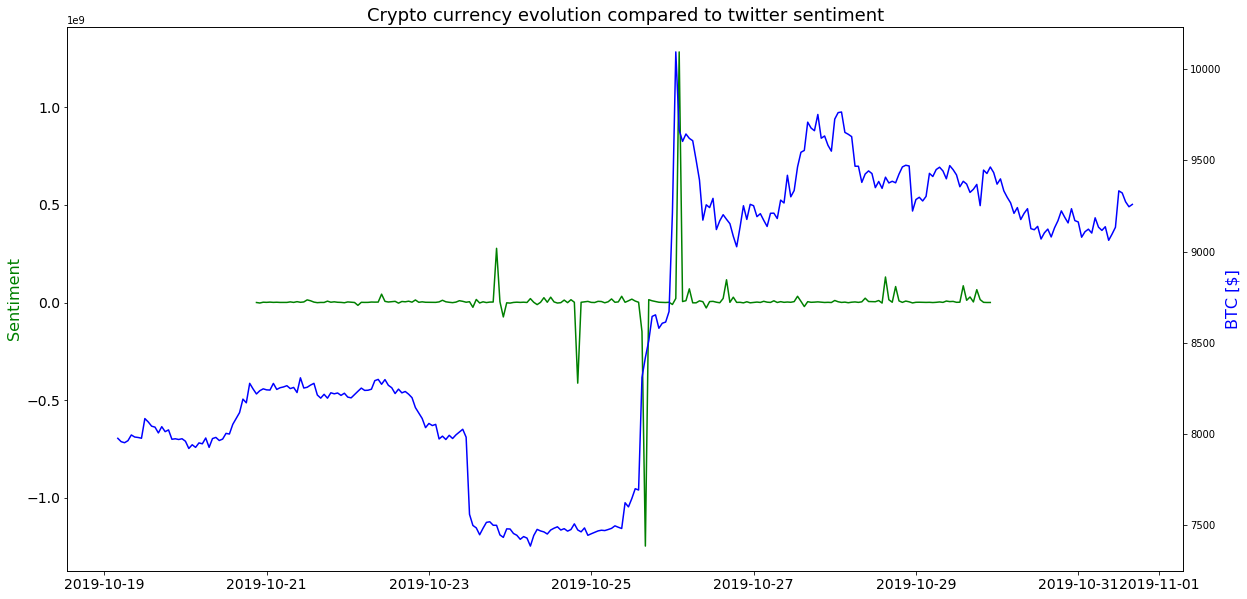

In [219]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Crypto currency evolution compared to twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped, 'g-')
ax2.plot_date(crypto_usd_grouped.index, crypto_usd_grouped, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel(f"{CURRENCY_SYMBOL} [$]", color='b', fontsize=16)
plt.show()

In [138]:
def crosscorr(datax, datay, lag=0, method="pearson"):
    return datax.corr(datay.shift(lag), method=method)

In [220]:
tweets_grouped.head()

CreatedAt2
2019-10-20 21:00:00   -9.474530e+03
2019-10-20 22:00:00   -2.574192e+06
2019-10-20 23:00:00    1.538100e+06
2019-10-21 00:00:00    7.822920e+05
2019-10-21 01:00:00    2.008957e+06
Freq: H, Name: score, dtype: float64

In [221]:
crypto_usd_grouped.head()

time2
2019-10-19 04:00:00    7976.00
2019-10-19 05:00:00    7957.54
2019-10-19 06:00:00    7951.91
2019-10-19 07:00:00    7963.07
2019-10-19 08:00:00    7994.46
Freq: H, Name: close, dtype: float64

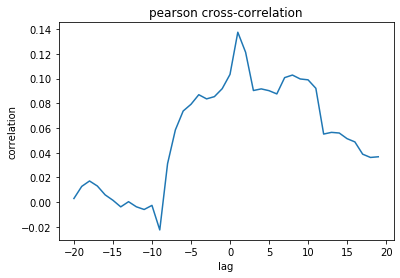

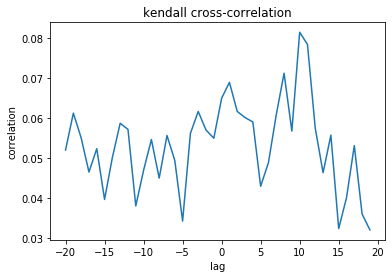

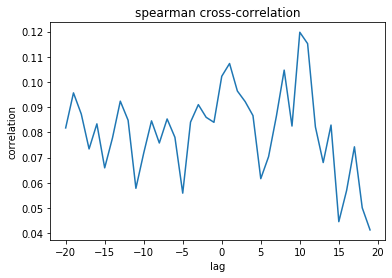

In [223]:
xcov = [crosscorr(tweets_grouped, crypto_usd_grouped, lag=i, method="pearson") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("pearson cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(tweets_grouped, crypto_usd_grouped, lag=i, method="kendall") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("kendall cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(tweets_grouped, crypto_usd_grouped, lag=i, method="spearman") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("spearman cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()